# **PREPROCESSAMENTO DEI DATI**

In questo file sono documentati i preprocessamenti applicati alle variabili del dataset. Ogni variabile è stata analizzata singolarmente per comprenderne il significato e identificare eventuali criticità, come dati mancanti, outlier, necessità di riscalamento o codifica delle variabili categoriche.

Il dataset è stato pulito e preparato per un'analisi descrittiva più approfondita, che verrà eseguita nel file Preprocessing_DataChallenge_Train_2ndPart.ipynb, insieme alla selezione delle feature.

Importiamo le librerie necessarie e montiamo il drive

In [217]:
import pandas as pd
from google.colab import drive
import numpy as np
from numpy.random import choice
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Percorso del file CSV e caricamento del dataset di train. Qui la lettura del file CSV viene effettuata con il delimitatore ';'. Vengono visualizzate le prime righe del dataset per conferma.

In [218]:
file_path_train = '/content/drive/MyDrive/Recruiting/DataChallenge/train.csv'

df_train = pd.read_csv(file_path_train, header=0, sep=';', engine='python')

print("Prime 5 righe del dataset di train:")
display(df_train.head())

Prime 5 righe del dataset di train:


,PAID,POINT_OF_SALE,EVENT_ID,YEAR,MONTH,N_SUBSCRIPTIONS,PRICE,PHONE_NUMBER,PROP_CONBINI,PAYMENT_TYPE,...,AGE,DAYS_FROM_PROMO,BOOKS_PAID,N_TRANSACTIONS,N_ITEMS,DATE_LAST_PURCHASE,CUSTOMER_SINCE,MAIL,SUBSCR_CANC,MARGIN
0,YES,BO,INN11033,2018,JUL,1,10.990,0,"0,0",Card,...,18,1.0,8.0,3.0,2,27/04/2018,06/01/2018,0,0,57.495203
1,YES,BO,INN16891,2018,SEP,1,13.300,0,"0,25",Cash,...,21,20.0,5.0,2.0,4,14/09/2018,09/02/2018,0,1,63.317036
2,YES,MI,INN12365,2018,MAY,2,18.785,0,"0,0",Card,...,24,6.0,NaN,NaN,3,01/01/0001,01/01/9999,0,0,NaN
3,YES,MI,INN15825,2018,APR,0,7.956,0,"0,0",Card,...,17,2.0,1.0,1.0,2,20/01/2018,20/01/2018,0,0,7.086054
4,YES,BO,INN32532,2018,JUN,0,12.000,0,"0,66667",Cash,...,21,2.0,NaN,NaN,3,01/01/0001,01/01/9999,0,0,NaN


Numero di righe e colonne:

In [219]:
print("Dimensione del dataset di train (righe, colonne):", df_train.shape)

Dimensione del dataset di train (righe, colonne): (17099, 21)


Guardo informazioni generali sul dataset

In [220]:
print("Informazioni generali sul dataset:")
df_train.info()

Informazioni generali sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17099 entries, 0 to 17098
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PAID                17099 non-null  object 
 1   POINT_OF_SALE       15207 non-null  object 
 2   EVENT_ID            17099 non-null  object 
 3   YEAR                17099 non-null  int64  
 4   MONTH               17099 non-null  object 
 5   N_SUBSCRIPTIONS     17099 non-null  int64  
 6   PRICE               17099 non-null  float64
 7   PHONE_NUMBER        17099 non-null  int64  
 8   PROP_CONBINI        17099 non-null  object 
 9   PAYMENT_TYPE        17099 non-null  object 
 10  FAV_GENRE           16132 non-null  object 
 11  AGE                 15376 non-null  object 
 12  DAYS_FROM_PROMO     17099 non-null  float64
 13  BOOKS_PAID          11525 non-null  float64
 14  N_TRANSACTIONS      11525 non-null  float64
 15  N_ITEMS           

La variabile target 'PAID' è di tipo object.
Analizzo se ci sono valori mancanti e poi procedo alla conversione della variabile categorica in variabile binaria.

In [221]:
missing_paid = df_train['PAID'].isnull().sum()
if missing_paid > 0:
    print(f"Ci sono {missing_paid} valori mancanti nella colonna PAID.")
else:
    print("Non ci sono valori mancanti nella colonna PAID.")

class_counts = df_train['PAID'].value_counts()
print("\nConteggio dei valori per classe nella colonna PAID:")
print(class_counts)

df_train['PAID'] = df_train['PAID'].map({'YES': 1, 'NO': 0})

if df_train['PAID'].dtype == int:
    print("\nLa colonna PAID è stata convertita correttamente in valori interi.")
else:
    print("\nErrore nella conversione della colonna PAID.")

Non ci sono valori mancanti nella colonna PAID.

Conteggio dei valori per classe nella colonna PAID:
PAID
YES    15639
NO      1460
Name: count, dtype: int64

La colonna PAID è stata convertita correttamente in valori interi.


Guardo il numero di duplicati nella colonna EVENT_ID (l'identificativo della transazione) per verificare se ci sono transazioni duplicate nel dataset.

In [222]:
duplicate_count = df_train['EVENT_ID'].duplicated().sum()

print(f"Numero di duplicati nella colonna EVENT_ID: {duplicate_count}")

Numero di duplicati nella colonna EVENT_ID: 0


Nelle sezioni successive, verranno analizzate le variabili individualmente per identificare eventuali criticità e procedere con la loro pulizia.

#POINT_OF_SALE

Osservo le prime righe della colonna 'POINT_OF_SALE'

In [223]:
df_train['POINT_OF_SALE'].head()

,POINT_OF_SALE
0,BO
1,BO
2,MI
3,MI
4,BO


Dall'analisi preliminare so che ci sono valori mancanti, conto quanti ce ne sono.




In [224]:
missing_count = df_train['POINT_OF_SALE'].isnull().sum()
print(f"Numero di valori mancanti in POINT_OF_SALE: {missing_count}")


Numero di valori mancanti in POINT_OF_SALE: 1892


Conto le occorrenze di ciascuna categoria nella variabile POINT_OF_SALE.

In [225]:
point_of_sale_counts = df_train['POINT_OF_SALE'].value_counts()

print("Conteggio delle occorrenze per ogni categoria in POINT_OF_SALE:")
print(point_of_sale_counts)

Conteggio delle occorrenze per ogni categoria in POINT_OF_SALE:
POINT_OF_SALE
BO    10687
RM     2458
MI     2062
Name: count, dtype: int64


Osservo un significativo sbilanciamento tra le tre classi identificate; di conseguenza, per l'imputazione dei valori mancanti, opto per un metodo di imputazione casuale ponderata.

Distribuzione delle categorie esistenti:

In [226]:
categories = df_train['POINT_OF_SALE'].dropna().unique()
weights = df_train['POINT_OF_SALE'].dropna().value_counts(normalize=True)

Sostituzione casuale basata sulle probabilità della distribuzione:

In [227]:
df_train['POINT_OF_SALE'] = df_train['POINT_OF_SALE'].apply(
    lambda x: np.random.choice(categories, p=weights) if pd.isnull(x) else x
)

print("Valori mancanti sostituiti con imputazione casuale ponderata.")

Valori mancanti sostituiti con imputazione casuale ponderata.


Verifico che l'imputazione casuale ponderata sia andata a buon fine:

In [228]:
point_of_sale_counts = df_train['POINT_OF_SALE'].value_counts()

print("Conteggio delle occorrenze per ogni categoria in POINT_OF_SALE:")
print(point_of_sale_counts)

Conteggio delle occorrenze per ogni categoria in POINT_OF_SALE:
POINT_OF_SALE
BO    12022
RM     2700
MI     2377
Name: count, dtype: int64


L'imputazione casuale ponderata permette di preservare la distribuzione delle variabili rispetto alla variabile target PAID, mantenendo proporzionalità rispetto alla distribuzione originale. In questo modo, la ripartizione delle righe tra le classi 0 e 1 rimane invariata, evitando che l'imputazione alteri l'equilibrio tra le classi.

# FAV_GENRE

Il trattamento dei valori mancanti per questa variabile è stato effettuato seguendo lo stesso procedimento adottato per la variabile precedente. Di seguito sono riportati i passaggi eseguiti:

Conto le righe con valori mancanti:

In [229]:
missing_count = df_train['FAV_GENRE'].isnull().sum()

In [230]:
missing_count

967

Conto le occorrenze di ciascuna categoria nella variabile FAV_GENRE

In [231]:
fav_genre_counts = df_train['FAV_GENRE'].value_counts()

print("Conteggio delle occorrenze per ogni categoria in FAV_GENRE:")
print(fav_genre_counts)

Conteggio delle occorrenze per ogni categoria in FAV_GENRE:
FAV_GENRE
Shonen    13495
Shojo      2633
Seinen        4
Name: count, dtype: int64


Le classi risultano fortemente sbilanciate.

Distribuzione delle categorie esistenti:

In [232]:
categories = df_train['FAV_GENRE'].dropna().unique()
weights = df_train['FAV_GENRE'].dropna().value_counts(normalize=True)

Sostituzione casuale basata sulle probabilità della distribuzione

In [233]:
df_train['FAV_GENRE'] = df_train['FAV_GENRE'].apply(
    lambda x: np.random.choice(categories, p=weights) if pd.isnull(x) else x
)

print("Valori mancanti sostituiti con imputazione casuale ponderata.")

Valori mancanti sostituiti con imputazione casuale ponderata.


Conto le occorrenze di ciascuna categoria nella variabile FAV_GENRE

In [234]:
fav_genre_counts = df_train['FAV_GENRE'].value_counts()

print("Conteggio delle occorrenze per ogni categoria in FAV_GENRE:")
print(fav_genre_counts)

Conteggio delle occorrenze per ogni categoria in FAV_GENRE:
FAV_GENRE
Shonen    14305
Shojo      2790
Seinen        4
Name: count, dtype: int64


Osservo il risultato delle imputazioni:

In [235]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17099 entries, 0 to 17098
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PAID                17099 non-null  int64  
 1   POINT_OF_SALE       17099 non-null  object 
 2   EVENT_ID            17099 non-null  object 
 3   YEAR                17099 non-null  int64  
 4   MONTH               17099 non-null  object 
 5   N_SUBSCRIPTIONS     17099 non-null  int64  
 6   PRICE               17099 non-null  float64
 7   PHONE_NUMBER        17099 non-null  int64  
 8   PROP_CONBINI        17099 non-null  object 
 9   PAYMENT_TYPE        17099 non-null  object 
 10  FAV_GENRE           17099 non-null  object 
 11  AGE                 15376 non-null  object 
 12  DAYS_FROM_PROMO     17099 non-null  float64
 13  BOOKS_PAID          11525 non-null  float64
 14  N_TRANSACTIONS      11525 non-null  float64
 15  N_ITEMS             17099 non-null  int64  
 16  DATE

# YEAR

Conto il numero di occorenze per anno della variabile YEAR.

In [236]:
df_train['YEAR'].value_counts()

,count
YEAR,
2018,17099


Poiché l'anno è costante in tutto il dataset, questa variabile non apporta alcuna informazione significativa alla classificazione binaria. Pertanto, possiamo escludere la colonna YEAR dal dataset senza perdere informazioni utili.

In [237]:
df_train = df_train.drop(columns=['YEAR'])

# N_SUBSCRIPTIONS

Questa variabile non presetna valori mancanti. Procedo a contare le occorrenze di ciascuna categoria.

In [238]:
n_subscriptions = df_train['N_SUBSCRIPTIONS'].value_counts()

print("Conteggio delle occorrenze per ogni categoria in N_SUBSCRIPTIONS:")
print(n_subscriptions)

Conteggio delle occorrenze per ogni categoria in N_SUBSCRIPTIONS:
N_SUBSCRIPTIONS
0    7726
1    6560
2    2343
3     411
4      56
5       3
Name: count, dtype: int64


La distribuzione della variabile N_SUBSCRIPTIONS risulta sbilanciata, con la maggior parte dei valori concentrati su 0, 1 e 2 abbonamenti. Le frequenze diminuiscono drasticamente all’aumentare del numero di abbonamenti, evidenziando che i casi con più di 2 abbonamenti sono più rari. Questo suggerisce che solo una piccola percentuale di clienti sottoscrive un numero elevato di abbonamenti, confermando un comportamento predominante verso un numero limitato di sottoscrizioni.

# SUBSCR_CANC

In [239]:
n_subscr_canc= df_train['SUBSCR_CANC'].value_counts()

print("Conteggio delle occorrenze per ogni categoria in n_subsc_canc:")
print(n_subscr_canc)

Conteggio delle occorrenze per ogni categoria in n_subsc_canc:
SUBSCR_CANC
0    14540
1     1536
2      635
3      301
4       56
5       31
Name: count, dtype: int64


La distribuzione di SUBSCR_CANC mostra che la maggioranza dei clienti non ha mai cancellato un abbonamento, indicando un alto grado di stabilità.
I clienti con 1 o più cancellazioni rappresentano una minoranza:
- 1 cancellazione: 1.536 osservazioni.
- 2 cancellazioni: 635 osservazioni.
- 3 cancellazioni: 301 osservazioni.
- Valori superiori (4 o più cancellazioni) diventano progressivamente meno frequenti.
Questa distribuzione segue un andamento dove le cancellazioni multiple sono meno comuni.

Calcolo della percentuale di abbonamenti annullati sul totale

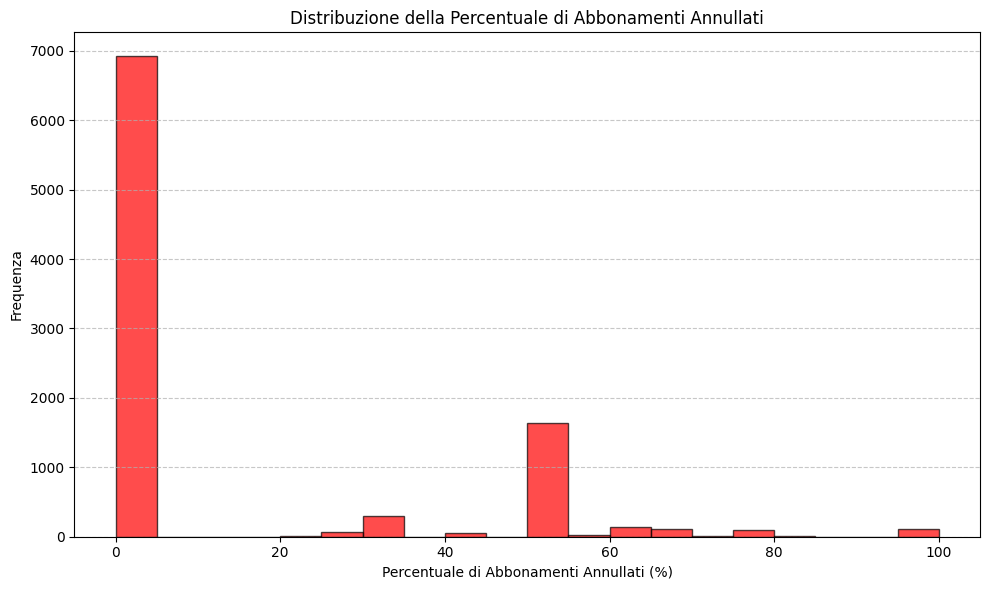

In [240]:
df_train['PERCENTAGE_CANCELLED'] = np.where(
    (df_train['SUBSCR_CANC'] + df_train['N_SUBSCRIPTIONS']) == 0,
    np.nan,  # Assegna NaN se il denominatore è zero
    (df_train['SUBSCR_CANC'] / (df_train['SUBSCR_CANC'] + df_train['N_SUBSCRIPTIONS'])) * 100
)

valid_percentages = df_train['PERCENTAGE_CANCELLED'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(valid_percentages, bins=20, edgecolor='black', alpha=0.7, color='red')
plt.title("Distribuzione della Percentuale di Abbonamenti Annullati")
plt.xlabel("Percentuale di Abbonamenti Annullati (%)")
plt.ylabel("Frequenza")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [241]:
df_train.drop(columns=['PERCENTAGE_CANCELLED'], inplace=True)

La maggior parte delle osservazioni si trova nella fascia vicina allo 0%. Questo indica che per la maggioranza dei clienti, la percentuale di abbonamenti annullati è molto bassa o addirittura nulla. Si osservano dei picchi isolati attorno al 40% e al 60%. Esistono osservazioni con una percentuale di cancellazioni pari al 100%. Questi casi rappresentano clienti che hanno annullato tutti gli abbonamenti sottoscritti.

# MONTH

In [242]:
MONTH= df_train['MONTH'].value_counts(dropna=False)

print("Conteggio delle occorrenze per ogni categoria in MARGIN:")
print(MONTH)

Conteggio delle occorrenze per ogni categoria in MARGIN:
MONTH
JUN    2094
OCT    2062
APR    1889
SEP    1812
MAY    1805
MAR    1771
AUG    1682
JUL    1647
FEB    1344
JAN     993
Name: count, dtype: int64


Osservazioni:
- Giugno (JUN) è il mese con il maggior numero di occorrenze , seguito da Ottobre (OCT) e Aprile (APR).
Questi mesi potrebbero corrispondere a periodi di maggiore attività per i clienti o a stagionalità legate al business.

- Gennaio (JAN) è il mese con il minor numero di occorrenze, seguito da Febbraio (FEB).
Questo potrebbe indicare una diminuzione dell'attività nei primi mesi dell'anno, forse a causa di un calo stagionale o di altre influenze specifiche.
- La stagionalità sembra avere un ruolo importante, con un picco nei mesi primaverili ed estivi (da Aprile a Luglio) e un calo evidente nei mesi invernali (Gennaio e Febbraio).

# ENCODING DELLE VARIABILI CATEGORICHE ORDINALI

In [243]:
month_mapping = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

df_train['MONTH'] = df_train['MONTH'].str.strip()

df_train['MONTH'] = df_train['MONTH'].map(month_mapping)

<Figure size 1000x600 with 0 Axes>

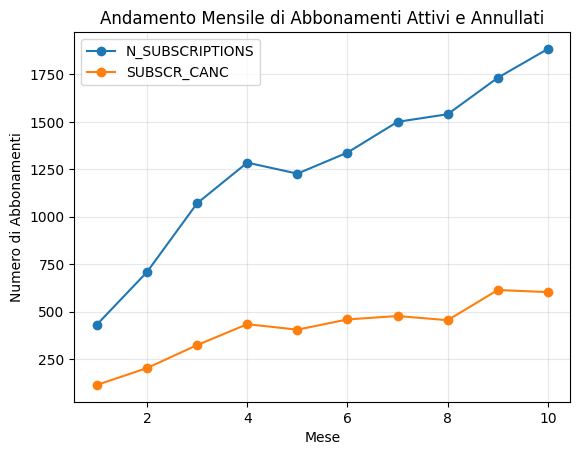

In [244]:
monthly_data = df_train.groupby('MONTH')[['N_SUBSCRIPTIONS', 'SUBSCR_CANC']].sum()

plt.figure(figsize=(10, 6))
monthly_data.plot(kind='line', marker='o')
plt.title('Andamento Mensile di Abbonamenti Attivi e Annullati')
plt.xlabel('Mese')
plt.ylabel('Numero di Abbonamenti')
plt.grid(alpha=0.3)
plt.show()

Il grafico evidenzia una situazione generalmente positiva per il servizio: gli abbonamenti attivi crescono costantemente, mentre le cancellazioni restano basse e stabili.
L'assenza di picchi significativi nelle cancellazioni potrebbe indicare una buona percezione del servizio o l'assenza di eventi critici che abbiano spinto i clienti ad annullare in massa i loro abbonamenti.

# PRICE

La variabile 'PRICE' è una variabile continua che non presenta valori mancanti. Procedo a visualizzare la sua distribuzione utilizzando un istogramma.

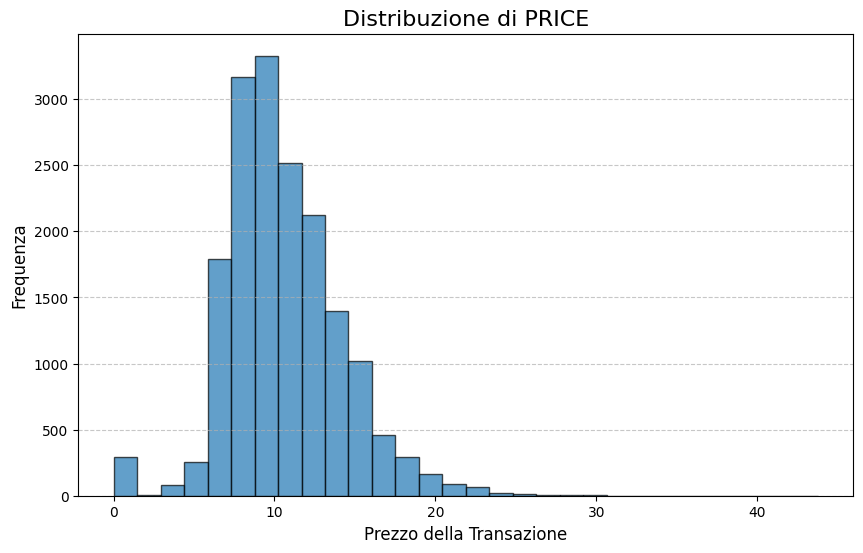

In [245]:
# Istogramma della distribuzione di PRICE
plt.figure(figsize=(10, 6))
df_train['PRICE'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribuzione di PRICE', fontsize=16)
plt.xlabel('Prezzo della Transazione', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Calcolo e visualizzazione delle statistiche di base per la variabile 'PRICE':

In [246]:
price_stats = {
    'Media': df_train['PRICE'].mean(),
    'Mediana': df_train['PRICE'].median(),
    'Deviazione Standard': df_train['PRICE'].std(),
    'Valore Minimo': df_train['PRICE'].min(),
    'Valore Massimo': df_train['PRICE'].max(),
    '25° Percentile (Q1)': df_train['PRICE'].quantile(0.25),
    '75° Percentile (Q3)': df_train['PRICE'].quantile(0.75),
    'Intervallo Interquartile (IQR)': df_train['PRICE'].quantile(0.75) - df_train['PRICE'].quantile(0.25)
}

for stat, value in price_stats.items():
    print(f"{stat}: {value:.2f}")


Media: 10.54
Mediana: 10.00
Deviazione Standard: 3.60
Valore Minimo: 0.00
Valore Massimo: 43.80
25° Percentile (Q1): 8.10
75° Percentile (Q3): 12.61
Intervallo Interquartile (IQR): 4.51


Osservazioni:

- Media e mediana presentano valori simili e ciò suggerisce che la distribuzione è quasi simmetrica o con una lieve asimmetria positiva (skewness). La mediana è leggermente inferiore alla media, suggerendo la presenza di alcuni valori elevati (outlier) che spostano leggermente la media verso destra.
- La deviaizione standard indica che la variabilità dei dati è moderata.
- Circa il 50% dei valori si trova nell’intervallo tra Q1 (8.10) e Q3 (12.61), evidenziando una buona concentrazione dei prezzi in questa fascia.
- Valori estremi:
Esistono transazioni con prezzo pari a zero, che potrebbero rappresentare sia errori che valori mancanti codificati come zero.
Esistono valori significativamente più alti rispetto alla mediana, indicando la presenza di possibili outlier nella distribuzione.

Per una migliore analisi dei possibili outliers della distribuzione procediamo con la visualizzazione del boxplot.

Calcolo dei quantili e dell'IQR:

In [247]:
Q1 = df_train['PRICE'].quantile(0.25)
Q3 = df_train['PRICE'].quantile(0.75)
IQR = Q3 - Q1

Calcolo dei limiti per individuare gli outlier


In [248]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Identificazione degli outliers e visualizzazione del boxplot.

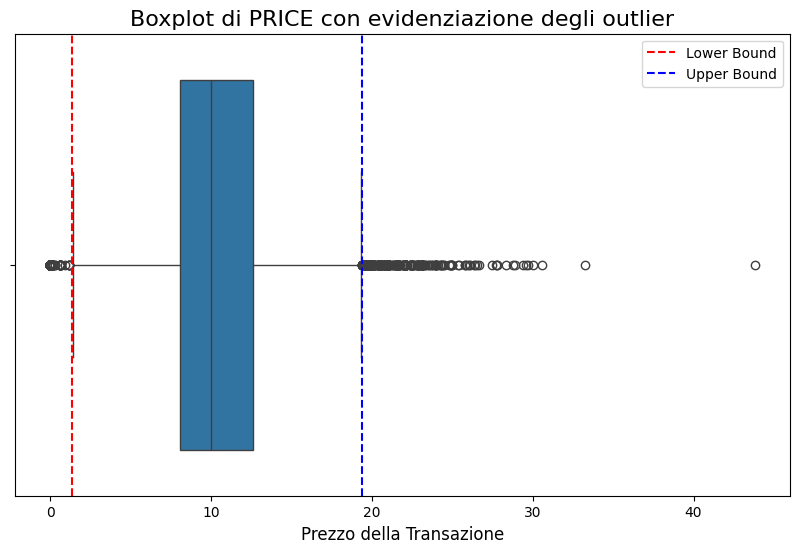

Numero totale di outlier: 621
Outlier trovati:
        PRICE
26     23.100
64      0.000
80      0.000
114     0.600
148     0.000
...       ...
16946   0.000
16962  19.530
16995  21.421
16998   0.000
17035   0.000

[621 rows x 1 columns]


In [249]:
outliers = df_train[(df_train['PRICE'] < lower_bound) | (df_train['PRICE'] > upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['PRICE'])
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound')
plt.title('Boxplot di PRICE con evidenziazione degli outlier', fontsize=16)
plt.xlabel('Prezzo della Transazione', fontsize=12)
plt.legend()
plt.show()

print(f"Numero totale di outlier: {len(outliers)}")
print("Outlier trovati:")
print(outliers[['PRICE']])

Effettuo un' analisi più accurata delle righe in cui sono stati rilevati gli outliers. Filtro le righe in cui PRICE è maggiore di upper bound:

In [250]:
price_above_upper_bound = df_train[df_train['PRICE'] > upper_bound]

price_above_upper_bound.head()

,PAID,POINT_OF_SALE,EVENT_ID,MONTH,N_SUBSCRIPTIONS,PRICE,PHONE_NUMBER,PROP_CONBINI,PAYMENT_TYPE,FAV_GENRE,AGE,DAYS_FROM_PROMO,BOOKS_PAID,N_TRANSACTIONS,N_ITEMS,DATE_LAST_PURCHASE,CUSTOMER_SINCE,MAIL,SUBSCR_CANC,MARGIN
26,0,MI,INN22249,8,1,23.100,0,"0,2",Card,Shonen,13,2.0,2.0,1.0,5,14/07/2018,14/07/2018,0,1,25.578055
152,1,RM,INN07756,8,1,20.100,0,"0,0",Card,Shonen,12,30.0,5.0,1.0,4,27/08/2018,27/08/2018,0,0,57.895114
153,1,RM,INN10533,9,1,19.400,0,"0,0",Card,Shonen,12,26.0,3.0,1.0,2,24/09/2018,24/09/2018,0,0,34.526183
171,1,RM,INN27377,9,1,24.849,0,"0,33333",Card,Shonen,14,10.0,3.0,1.0,6,06/08/2018,06/08/2018,0,0,35.804863
239,1,BO,INN13677,6,2,22.000,1,"0,2",Card,Shonen,23,26.0,NaN,NaN,5,01/01/0001,01/01/9999,1,0,NaN


Nonostante la presenza di outlier nella distribuzione, ritengo che questi valori siano plausibili, in quanto potrebbero rappresentare acquisti di articoli più costosi da parte dei clienti. Pertanto, non verranno eliminati.

Guardo ora le righe in cui i valori di PRICE sono al di sotto del lower bound identificato.

In [251]:
filtered_rows = df_train[df_train['PRICE'] < lower_bound]

filtered_rows

,PAID,POINT_OF_SALE,EVENT_ID,MONTH,N_SUBSCRIPTIONS,PRICE,PHONE_NUMBER,PROP_CONBINI,PAYMENT_TYPE,FAV_GENRE,AGE,DAYS_FROM_PROMO,BOOKS_PAID,N_TRANSACTIONS,N_ITEMS,DATE_LAST_PURCHASE,CUSTOMER_SINCE,MAIL,SUBSCR_CANC,MARGIN
64,1,BO,INN00619,6,1,0.0,0,"0,0",Coupon,Shonen,13,3.0,3.0,1.0,2,26/05/2018,26/05/2018,0,1,28.024457
80,1,BO,INN33219,2,0,0.0,0,"0,66667",Card,Shonen,17,16.0,6.0,3.0,3,15/02/2018,07/06/2017,0,0,71.310776
114,1,RM,INN05304,1,1,0.6,0,"0,33333",Card,Shonen,28,2.0,1.0,1.0,3,30/11/2017,30/11/2017,0,0,8.911065
148,1,BO,INN14915,6,1,0.0,0,"0,33333",Coupon,Seinen,19,1.0,NaN,NaN,3,01/01/0001,01/01/9999,0,0,NaN
155,1,BO,INN34973,5,0,0.0,0,"0,33333",Coupon,Shonen,13,12.0,5.0,2.0,3,12/05/2018,17/12/2017,0,0,50.358430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16921,1,BO,INN04428,7,2,0.0,0,"0,33333",Coupon,Shonen,12,20.0,25.0,10.0,3,17/07/2018,02/12/2017,0,0,256.562375
16924,1,MI,INN07701,7,1,0.6,0,"0,0",Card,Shonen,17,17.0,6.0,3.0,2,23/11/2017,01/02/2017,0,0,60.955304
16946,1,RM,INN09038,4,2,0.0,0,"0,0",Coupon,Shonen,16,17.0,1.0,1.0,3,07/04/2018,07/04/2018,0,1,11.473825
16998,1,RM,INN28612,2,0,0.0,0,"0,33333",Card,Shonen,15,12.0,1.0,1.0,3,27/01/2018,27/01/2018,0,0,8.001337


Mi soffermo in particolare sulle righe corrispondenti a prezzi nulli in quanto non considero possibile che una promozione possa rendere gratuito un prodotto.

In [252]:
filtered_rows = df_train[df_train['PRICE'] == 0.0]

count_price_zero = len(df_train[df_train['PRICE'] == 0.0])
count_price_zero

253

Inotltre, noto che il numero di items disposti nella transazione è maggiore di 0 quanto la variabile PRICE è nulla. Pertanto dispongo la cancellazione di queste righe dal dataset.

In [253]:
filtered_rows = df_train[(df_train['PRICE'] == 0.0) & (df_train['N_ITEMS'] > 0)]

count_filtered_rows = len(filtered_rows)
count_filtered_rows

253

In [254]:
df_train= df_train[df_train['PRICE'] != 0.0]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16846 entries, 0 to 17098
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PAID                16846 non-null  int64  
 1   POINT_OF_SALE       16846 non-null  object 
 2   EVENT_ID            16846 non-null  object 
 3   MONTH               16846 non-null  int64  
 4   N_SUBSCRIPTIONS     16846 non-null  int64  
 5   PRICE               16846 non-null  float64
 6   PHONE_NUMBER        16846 non-null  int64  
 7   PROP_CONBINI        16846 non-null  object 
 8   PAYMENT_TYPE        16846 non-null  object 
 9   FAV_GENRE           16846 non-null  object 
 10  AGE                 15149 non-null  object 
 11  DAYS_FROM_PROMO     16846 non-null  float64
 12  BOOKS_PAID          11332 non-null  float64
 13  N_TRANSACTIONS      11332 non-null  float64
 14  N_ITEMS             16846 non-null  int64  
 15  DATE_LAST_PURCHASE  16846 non-null  object 
 16  CUSTOMER_

Arrotondo i valori di PRICE alla seconda cifra decimale

In [255]:
df_train['PRICE'] = df_train['PRICE'].apply(lambda x: np.ceil(x * 100) / 100 if x != 0.0 else x)

<ipython-input-255-2b235a489b33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['PRICE'] = df_train['PRICE'].apply(lambda x: np.ceil(x * 100) / 100 if x != 0.0 else x)


In [256]:
df_train['PRICE'].head()

,PRICE
0,10.99
1,13.30
2,18.79
3,7.96
4,12.00


# PHONE NUMBER

La variabile PHONE_NUMBER non presenta valori mancanti.

Conto il numero di occorrenze di ciascuna categoria.

In [257]:
phone_number= df_train['PHONE_NUMBER'].value_counts(dropna=False)
print("Conteggio delle occorrenze per ogni categoria in phone number:")
print(phone_number)

Conteggio delle occorrenze per ogni categoria in phone number:
PHONE_NUMBER
0    16111
1      735
Name: count, dtype: int64


Noto un forte sbilanciamento tra la classe 0 e la classe 1.

Converto la variabile da float a int:

In [258]:
df_train['PHONE_NUMBER'] = df_train['PHONE_NUMBER'].astype(int)

# MAIL

Conto le occorrenze di ciascuna categoria nella variabile MAIL

In [259]:
mail= df_train['MAIL'].value_counts(dropna=False)

print("Conteggio delle occorrenze per ogni categoria in mail:")
print(mail)

Conteggio delle occorrenze per ogni categoria in mail:
MAIL
0    15702
1     1144
Name: count, dtype: int64


Anche in questo caso noto un forte sbilanciamento tra la classe 0 e la classe 1.

Converto la variabile da float a int:

In [260]:
df_train['MAIL'] = df_train['MAIL'].astype(int)

# PAYMENT_TYPE

Conto le occorrenze di ciascuna categoria nella variabile PAYMENT_TYPE

In [261]:
PAYMENT_TYPE= df_train['PAYMENT_TYPE'].value_counts(dropna=False)

print("Conteggio delle occorrenze per ogni categoria in MARGIN:")
print(PAYMENT_TYPE)

Conteggio delle occorrenze per ogni categoria in MARGIN:
PAYMENT_TYPE
Card      11003
Cash       4621
Coupon     1222
Name: count, dtype: int64


Anche in questo caso noto un forte sbilanciamento tra le classi.

# PROP CONBINI

La variabile PROP_COMBINI è una variabile continua, pertanto anche in questo caso procedo ad analizzare questa variabile come ho fatto in precedenza per PRICE.

Prima di tutto noto che la variabile è di tipo object. Procedo alla trasformazione dei valori, cambiando la ',' in '.' e poi trasformando il tipo di variabile in float.

In [262]:
df_train['PROP_CONBINI'].head()

,PROP_CONBINI
0,"0,0"
1,"0,25"
2,"0,0"
3,"0,0"
4,"0,66667"


In [263]:
df_train.loc[:, 'PROP_CONBINI'] = df_train['PROP_CONBINI'].str.replace(',', '.').astype(float)

Guardo l'istogramma della distribuzione

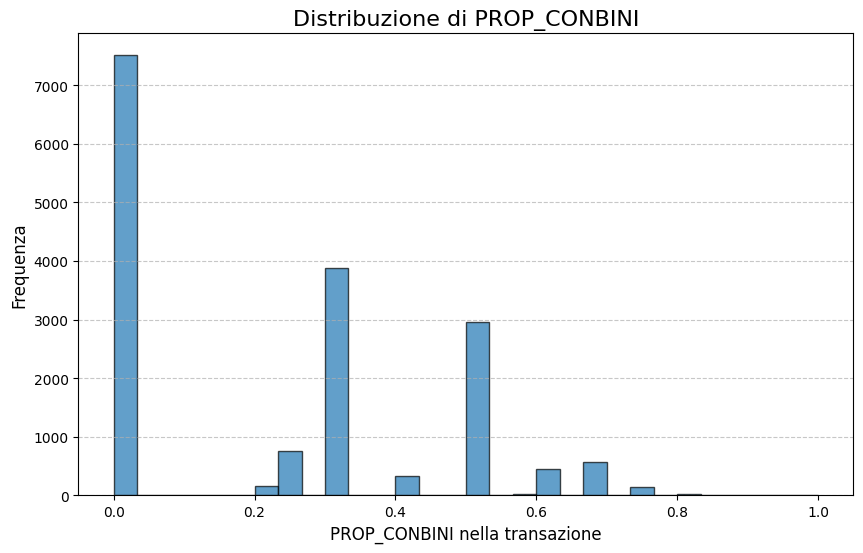

In [264]:
plt.figure(figsize=(10, 6))
df_train['PROP_CONBINI'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribuzione di PROP_CONBINI', fontsize=16)
plt.xlabel('PROP_CONBINI nella transazione', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La distribuzione risulta già riportata a valori tra 0 e 1 ed è molto sparsa

Procedo con l'identificazione degli eventuali outliers e delle metriche della distribuzione

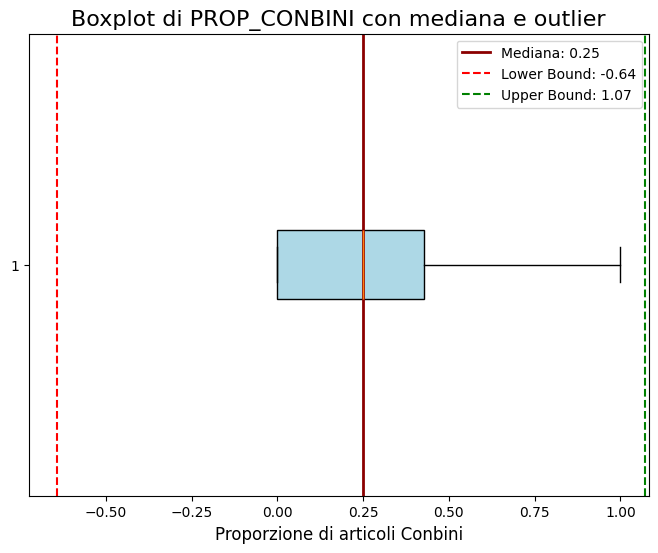

Numero di outlier: 0
Outlier trovati:
Series([], Name: PROP_CONBINI, dtype: object)

Statistiche di base per PROP_CONBINI:
Media: 0.23
Mediana: 0.25
Valore Minimo: 0.00
Valore Massimo: 1.00
25° Percentile (Q1): 0.00
75° Percentile (Q3): 0.43
Intervallo Interquartile (IQR): 0.43


In [265]:
mean_value = df_train['PROP_CONBINI'].mean()
median_value = df_train['PROP_CONBINI'].median()
min_value = df_train['PROP_CONBINI'].min()
max_value = df_train['PROP_CONBINI'].max()
Q1 = df_train['PROP_CONBINI'].quantile(0.25)
Q3 = df_train['PROP_CONBINI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(df_train['PROP_CONBINI'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))


plt.axvline(median_value, color='darkred', linestyle='-', label=f'Mediana: {median_value:.2f}', linewidth=2)


plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

plt.title('Boxplot di PROP_CONBINI con mediana e outlier', fontsize=16)
plt.xlabel('Proporzione di articoli Conbini', fontsize=12)

plt.legend()
plt.show()


outliers = df_train[(df_train['PROP_CONBINI'] < lower_bound) | (df_train['PROP_CONBINI'] > upper_bound)]
print(f"Numero di outlier: {len(outliers)}")
print("Outlier trovati:")
print(outliers['PROP_CONBINI'])


print("\nStatistiche di base per PROP_CONBINI:")
print(f"Media: {mean_value:.2f}")
print(f"Mediana: {median_value:.2f}")
print(f"Valore Minimo: {min_value:.2f}")
print(f"Valore Massimo: {max_value:.2f}")
print(f"25° Percentile (Q1): {Q1:.2f}")
print(f"75° Percentile (Q3): {Q3:.2f}")
print(f"Intervallo Interquartile (IQR): {IQR:.2f}")


Osservazioni:

- La variabile PROP_CONBINI è ben distribuita, senza outlier, con una maggioranza di valori concentrati nella fascia bassa (tra 0.00 e 0.43)

- L'intervallo interquartile (IQR) è piuttosto ampio rispetto alla media, suggerendo una variabilità moderata nella distribuzione.

- La presenza di un Q1 pari a 0.00 potrebbe indica che una parte significativa delle transazioni ha una proporzione PROP_CONBINI pari a 0 (nessun articolo "Conbini" nella transazione).

- Con un Q3 di 0.43, la maggior parte delle transazioni contiene una bassa proporzione di articoli "Conbini", con solo il 25% che supera questa soglia.

- Valori elevati (vicini a 1) sono relativamente rari, ma non vengono considerati outlier.

Dato che i valori sono compatti, e senza outlier, creo categorie basate sull'intervallo interquartile (basso, medio, alto)

In [266]:
def categorize_prop_conbini(value, q1, q3):
    if value <= q1:
        return 'Basso'
    elif q1 < value <= q3:
        return 'Medio'
    else:
        return 'Alto'


Q1 = df_train['PROP_CONBINI'].quantile(0.25)
Q3 = df_train['PROP_CONBINI'].quantile(0.75)

df_train['PROP_CONBINI'] = df_train['PROP_CONBINI'].apply(categorize_prop_conbini, args=(Q1, Q3))

print(df_train['PROP_CONBINI'].value_counts())

PROP_CONBINI
Basso    7507
Medio    5145
Alto     4194
Name: count, dtype: int64


La suddivisione in categorie appare abbastanza rappresentativa dei dati della distribuzione. La categoria più rappresentata è quella di PROP_CONBINI basso, che riflette l'asimmetria della distribuzione iniziale.

In [267]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16846 entries, 0 to 17098
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PAID                16846 non-null  int64  
 1   POINT_OF_SALE       16846 non-null  object 
 2   EVENT_ID            16846 non-null  object 
 3   MONTH               16846 non-null  int64  
 4   N_SUBSCRIPTIONS     16846 non-null  int64  
 5   PRICE               16846 non-null  float64
 6   PHONE_NUMBER        16846 non-null  int64  
 7   PROP_CONBINI        16846 non-null  object 
 8   PAYMENT_TYPE        16846 non-null  object 
 9   FAV_GENRE           16846 non-null  object 
 10  AGE                 15149 non-null  object 
 11  DAYS_FROM_PROMO     16846 non-null  float64
 12  BOOKS_PAID          11332 non-null  float64
 13  N_TRANSACTIONS      11332 non-null  float64
 14  N_ITEMS             16846 non-null  int64  
 15  DATE_LAST_PURCHASE  16846 non-null  object 
 16  CUSTOMER_

# AGE

Conto il numero di occorrenza di ciascuna categoria nella variabile AGE:

In [268]:
age = df_train['AGE'].value_counts(dropna=False)

print("Conteggio delle occorrenze per ogni categoria in AGE:")
print(age)

Conteggio delle occorrenze per ogni categoria in AGE:
AGE
NaN     1697
<=10    1538
17      1045
18      1037
19      1035
16      1019
20       971
15       959
14       907
21       903
22       849
13       800
23       727
12       705
24       617
11       608
25       471
26       354
27       252
28       159
30+       97
29        96
Name: count, dtype: int64


Sostituisco temporanemanete le stringhe '<=10' e '30+' con 10 e 30 rispettivamente. Questo mi risulterà poi utile quando andrò a categorizzare la variabile AGE suddividendola in tre categorie.

In [269]:
df_train['AGE'] = df_train['AGE'].replace({'<=10': 10, '30+': 30}).astype(float)

Creo l'istogramma per visualizzare la distribuzione senza dati mancanti.

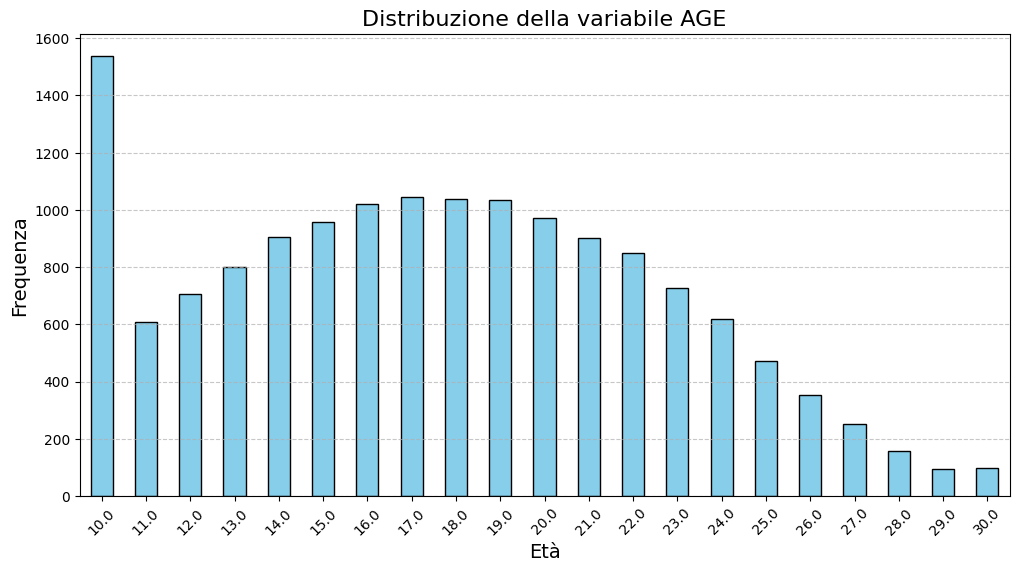

In [270]:
age_distribution = df_train['AGE'].dropna().value_counts().sort_index()
plt.figure(figsize=(12, 6))
age_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuzione della variabile AGE', fontsize=16)
plt.xlabel('Età', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Avendo convertito i dati delle categorie '<=10' e '+30' in 10 e 30 rispettivamente, possiamo fare le seguenti considerazioni:

- La categoria '<=10' è quella maggiormente rappresentata nel dataset, come si può osserare dal picco della distribuzione nella parte sinistra de grafico e dal dato numerico del conteggio precedentemente visualizzato.
- La categoria 30+, che rappresenta i clienti di età superiore ai 30 anni che acquistano i prodotti, è tra le meno rappresentate con sole 97 righe, evidenziando una preferenza marcata verso fasce d'età più giovani.

Calcolo le statistiche di base escludendo i valori mancanti:

In [271]:
age_cleaned = df_train['AGE'].dropna()

mean_age = age_cleaned.mean()
median_age = age_cleaned.median()
min_age = age_cleaned.min()
max_age = age_cleaned.max()
q1_age = age_cleaned.quantile(0.25)
q3_age = age_cleaned.quantile(0.75)
iqr_age = q3_age - q1_age
std_age = age_cleaned.std()

print("Statistiche dettagliate per la variabile AGE (escludendo i valori mancanti):")
print(f"Media: {mean_age:.2f}")
print(f"Mediana: {median_age:.2f}")
print(f"Valore Minimo: {min_age:.2f}")
print(f"Valore Massimo: {max_age:.2f}")
print(f"25° Percentile (Q1): {q1_age:.2f}")
print(f"75° Percentile (Q3): {q3_age:.2f}")
print(f"Intervallo Interquartile (IQR): {iqr_age:.2f}")
print(f"Deviazione Standard: {std_age:.2f}")
print(f"Conteggio dei valori validi: {len(age_cleaned)}")

Statistiche dettagliate per la variabile AGE (escludendo i valori mancanti):
Media: 17.62
Mediana: 17.00
Valore Minimo: 10.00
Valore Massimo: 30.00
25° Percentile (Q1): 14.00
75° Percentile (Q3): 21.00
Intervallo Interquartile (IQR): 7.00
Deviazione Standard: 4.97
Conteggio dei valori validi: 15149


Osservazioni:

- Media (17.62) e Mediana (17.00) sono molto vicine, indicando che la distribuzione è leggermente simmetrica e centrata intorno ai 17 anni.
- La fascia adolescenziale (14-21 anni) è rappresentata dalla maggior parte dei dati, come indicato dall'intervallo interquartile.
- La deviazione standard (4.97) mostra una moderata dispersione intorno alla media, ma non sono presenti valori estremi significativi (minimo = 10, massimo = 30).

In [272]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16846 entries, 0 to 17098
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PAID                16846 non-null  int64  
 1   POINT_OF_SALE       16846 non-null  object 
 2   EVENT_ID            16846 non-null  object 
 3   MONTH               16846 non-null  int64  
 4   N_SUBSCRIPTIONS     16846 non-null  int64  
 5   PRICE               16846 non-null  float64
 6   PHONE_NUMBER        16846 non-null  int64  
 7   PROP_CONBINI        16846 non-null  object 
 8   PAYMENT_TYPE        16846 non-null  object 
 9   FAV_GENRE           16846 non-null  object 
 10  AGE                 15149 non-null  float64
 11  DAYS_FROM_PROMO     16846 non-null  float64
 12  BOOKS_PAID          11332 non-null  float64
 13  N_TRANSACTIONS      11332 non-null  float64
 14  N_ITEMS             16846 non-null  int64  
 15  DATE_LAST_PURCHASE  16846 non-null  object 
 16  CUSTOMER_

Verifico come i valori mancanti di AGE si distribuiscono rispetto alle variabili categoriche. Per brevità qui viene riportata l'analisi solo rispetto alla variabile PAID binaria ma le stesse considerazioni posso essere fatte per tutte le altre variabili categoriche del dataset.

In [273]:
df_train['AGE_MISSING'] = df_train['AGE'].isnull().astype(int)

print(df_train['AGE_MISSING'].value_counts())

AGE_MISSING
0    15149
1     1697
Name: count, dtype: int64


In [274]:
missing_vs_paid = pd.crosstab(df_train['PAID'], df_train['AGE_MISSING'], normalize='index') * 100

print("Distribuzione percentuale di AGE_MISSING rispetto a PAID:")
print(missing_vs_paid)


Distribuzione percentuale di AGE_MISSING rispetto a PAID:
AGE_MISSING          0          1
PAID                             
0            88.835616  11.164384
1            90.029897   9.970103


La percentuale di valori mancanti è simile per entrambe le classi di PAID (circa il 10-11% di valori mancanti).
Questo suggerisce che i valori mancanti di AGE non dipendono fortemente dalla variabile PAID.
Dato che le differenze tra le percentuali di valori mancanti nelle due classi sono minime (~1.19% di differenza), i valori mancanti di AGE sembrano essere casuali rispetto alla variabile PAID.
Pertanto procediamo con l'imputazione dei dati mancanti usando la mediana della distribuzione e eliminiamo la colonna di supporto precedentemente create.

In [275]:
median_age = df_train['AGE'].median()
print(f"Mediana calcolata per AGE: {median_age}")

df_train.loc[:, 'AGE'] = df_train['AGE'].fillna(median_age)

df_train.drop(columns=['AGE_MISSING'], inplace=True)

Mediana calcolata per AGE: 17.0


Visualizzo l'istogramma per vedere la nuova distribuzione dopo l'imputazione.

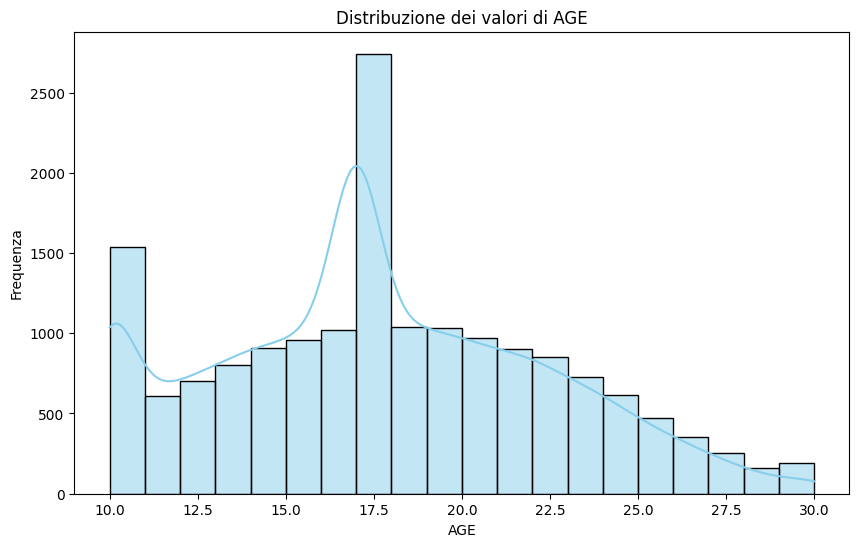

In [276]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Distribuzione dei valori di AGE')
plt.xlabel('AGE')
plt.ylabel('Frequenza')
plt.show()

Genero il boxplot  per la variabile AGE

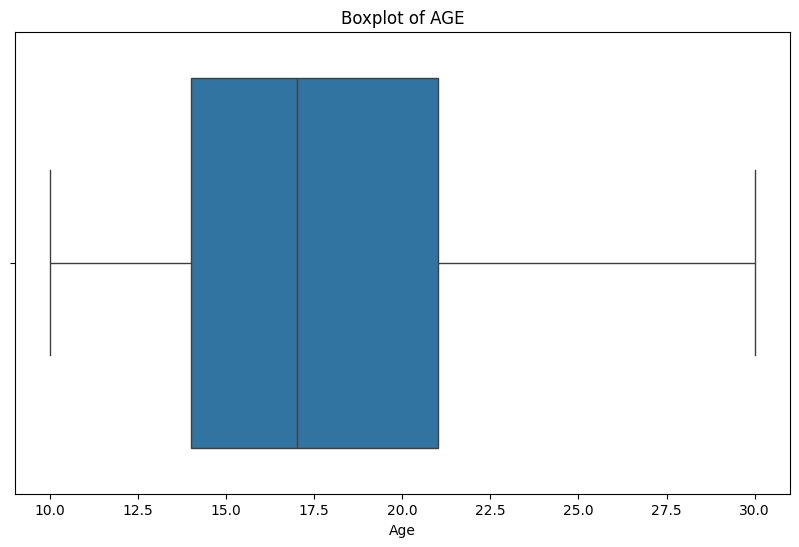

In [277]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['AGE'])
plt.title('Boxplot of AGE')
plt.xlabel('Age')
plt.show()

In [278]:
Q1

0.0

In [279]:
Q3

0.42857

Decido di suddividere in bin a seocnda di come sono distribuiti i valori nella distribuzione. Per farlo uso il primo e il terzo quantile e poi rinomino le etichette.

In [280]:
Q1 = df_train['AGE'].quantile(0.25)
Q3 = df_train['AGE'].quantile(0.75)

bins = [df_train['AGE'].min(), Q1, Q3, df_train['AGE'].max()]
labels=['<10–14', '15–21', '22–30+']

df_train['AGE'] = pd.cut(df_train['AGE'], bins=bins, labels=labels, include_lowest=True)

print("Conteggio delle osservazioni per ciascun bin di AGE:")
print(df_train['AGE'].value_counts())

Conteggio delle osservazioni per ciascun bin di AGE:
AGE
15–21     8666
<10–14    4558
22–30+    3622
Name: count, dtype: int64


In [281]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16846 entries, 0 to 17098
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PAID                16846 non-null  int64   
 1   POINT_OF_SALE       16846 non-null  object  
 2   EVENT_ID            16846 non-null  object  
 3   MONTH               16846 non-null  int64   
 4   N_SUBSCRIPTIONS     16846 non-null  int64   
 5   PRICE               16846 non-null  float64 
 6   PHONE_NUMBER        16846 non-null  int64   
 7   PROP_CONBINI        16846 non-null  object  
 8   PAYMENT_TYPE        16846 non-null  object  
 9   FAV_GENRE           16846 non-null  object  
 10  AGE                 16846 non-null  category
 11  DAYS_FROM_PROMO     16846 non-null  float64 
 12  BOOKS_PAID          11332 non-null  float64 
 13  N_TRANSACTIONS      11332 non-null  float64 
 14  N_ITEMS             16846 non-null  int64   
 15  DATE_LAST_PURCHASE  16846 non-null  objec

# DAYS_FROM_PROMO

Conto le occorrenze di ciascuna categoria nella variabile DAYS_FROM_PROMO

In [282]:
days_from_promo = df_train['DAYS_FROM_PROMO'].value_counts()

print("Conteggio delle occorrenze per ogni categoria in days_from_promo:")
print(days_from_promo)

Conteggio delle occorrenze per ogni categoria in days_from_promo:
DAYS_FROM_PROMO
2.0     1133
3.0     1053
29.0     952
30.0     914
28.0     876
1.0      793
4.0      789
27.0     705
5.0      549
26.0     505
25.0     456
31.0     455
23.0     448
6.0      441
17.0     439
13.0     425
18.0     424
16.0     419
22.0     418
24.0     418
12.0     410
11.0     406
20.0     397
15.0     391
7.0      388
10.0     386
8.0      383
9.0      375
19.0     374
21.0     367
14.0     357
Name: count, dtype: int64


Faccio il plot della distribuzione di DAYS_FROM_PROMO

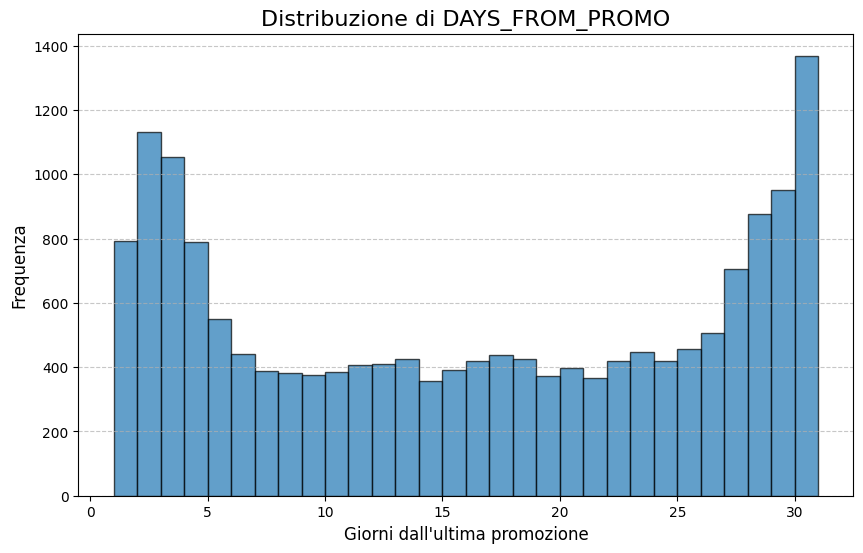

In [283]:
plt.figure(figsize=(10, 6))
df_train['DAYS_FROM_PROMO'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribuzione di DAYS_FROM_PROMO', fontsize=16)
plt.xlabel('Giorni dall\'ultima promozione', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Media: 15.72
Mediana: 16.00
Deviazione Standard: 10.16
25° Percentile (Q1): 5.00
75° Percentile (Q3): 26.00
Intervallo Interquartile (IQR): 21.00
Valore Minimo: 1.00
Valore Massimo: 31.00
Numero di Outlier: 0.00


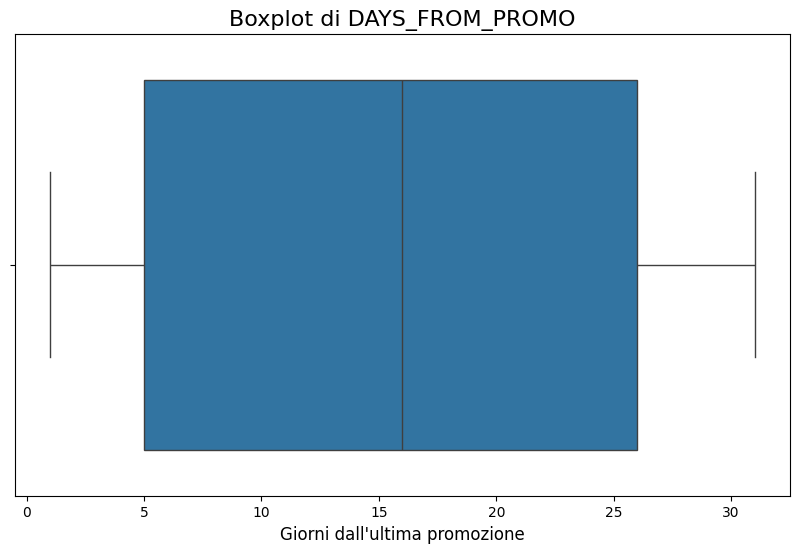

In [284]:
days_from_promo_stats = {
    'Media': df_train['DAYS_FROM_PROMO'].mean(),
    'Mediana': df_train['DAYS_FROM_PROMO'].median(),
    'Deviazione Standard': df_train['DAYS_FROM_PROMO'].std(),
    '25° Percentile (Q1)': df_train['DAYS_FROM_PROMO'].quantile(0.25),
    '75° Percentile (Q3)': df_train['DAYS_FROM_PROMO'].quantile(0.75),
    'Intervallo Interquartile (IQR)': df_train['DAYS_FROM_PROMO'].quantile(0.75) - df_train['DAYS_FROM_PROMO'].quantile(0.25),
    'Valore Minimo': df_train['DAYS_FROM_PROMO'].min(),
    'Valore Massimo': df_train['DAYS_FROM_PROMO'].max()
}


Q1 = days_from_promo_stats['25° Percentile (Q1)']
Q3 = days_from_promo_stats['75° Percentile (Q3)']
IQR = days_from_promo_stats['Intervallo Interquartile (IQR)']
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train['DAYS_FROM_PROMO'] < lower_bound) | (df_train['DAYS_FROM_PROMO'] > upper_bound)]
num_outliers = len(outliers)

days_from_promo_stats['Numero di Outlier'] = num_outliers

for stat, value in days_from_promo_stats.items():
    print(f"{stat}: {value:.2f}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['DAYS_FROM_PROMO'])
plt.title('Boxplot di DAYS_FROM_PROMO', fontsize=16)
plt.xlabel('Giorni dall\'ultima promozione', fontsize=12)
plt.show()

Osservazioni:
- I dati sono ben distribuiti, senza outlier e con una moderata variabilità.
- La leggera simmetria nella distribuzione (media ≈ mediana) rafforza l'affidabilità dei valori.
Il range centrale (Q1-Q3) copre una fascia ampia (5-26), suggerendo un dataset con diversità nei valori.
- La deviazione standard mostra una moderata dispersione dei valori intorno alla media.
- L'IQR, che rappresenta il range centrale del 50% dei dati (tra Q1 e Q3), è piuttosto ampio, suggerendo che i dati sono distribuiti su una larga fascia.
- L'intervallo di valori è ampio, da 1 a 31.
  

La bimodalità della distribzuione non viene captata da dalla media e dalla deviazione standard pertanto decido di dividere  la variabile in due gruppi usando un threshold basato sull'andamento della distribuzione.

In [285]:
threshold = 16
df_train['DAYS_FROM_PROMO_BIN'] = df_train['DAYS_FROM_PROMO'].apply(lambda x: 'Vicino' if x <= threshold else 'Lontano')

print(df_train['DAYS_FROM_PROMO_BIN'].value_counts())

DAYS_FROM_PROMO_BIN
Vicino     8698
Lontano    8148
Name: count, dtype: int64


Distribuzione percentuale della variabile PAID per i gruppi di DAYS_FROM_PROMO:
PAID                        0          1
DAYS_FROM_PROMO_BIN                     
Lontano              8.676976  91.323024
Vicino               8.657163  91.342837


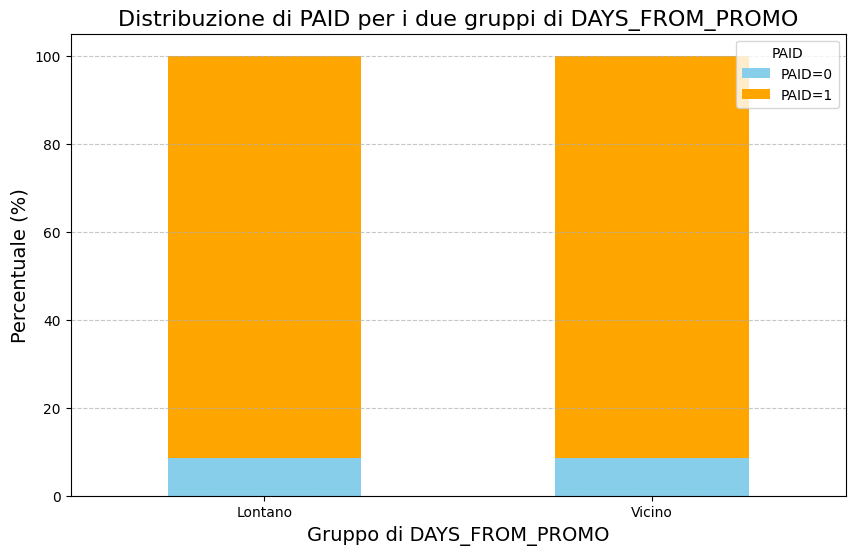

In [286]:
paid_distribution = pd.crosstab(df_train['DAYS_FROM_PROMO_BIN'], df_train['PAID'], normalize='index') * 100

print("Distribuzione percentuale della variabile PAID per i gruppi di DAYS_FROM_PROMO:")
print(paid_distribution)


paid_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Distribuzione di PAID per i due gruppi di DAYS_FROM_PROMO', fontsize=16)
plt.xlabel('Gruppo di DAYS_FROM_PROMO', fontsize=14)
plt.ylabel('Percentuale (%)', fontsize=14)
plt.legend(title='PAID', loc='upper right', labels=['PAID=0', 'PAID=1'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


Entrambi i gruppi mostrano comportamenti molto simili rispetto alla variabile PAID. La probabilità di avere PAID=1 è alta (circa il 91%), indipendentemente dal gruppo.
Poiché la distribuzione di PAID è quasi identica tra i due gruppi, la variabile DAYS_FROM_PROMO_BIN potrebbe non essere particolarmente utile come predittore diretto per il target PAID. Esamineremo la sua rilevanza rispetto alla varibile target con Feature selection.

Controlliamo la sua non rilevanza rispetto alla variabile target usando il test del chi2

In [287]:
contingency_table = pd.crosstab(df_train['DAYS_FROM_PROMO_BIN'], df_train['PAID'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2:.2f}, p-valore: {p:.4f}")

Chi2: 0.00, p-valore: 0.9854


p-valore > 0.05: Non ci sono differenze significative tra i gruppi. Per il momento decido di mantenere la nuova colonna creata DAYS_FROM_PROMO_BIN per analisi future.

In [288]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16846 entries, 0 to 17098
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PAID                 16846 non-null  int64   
 1   POINT_OF_SALE        16846 non-null  object  
 2   EVENT_ID             16846 non-null  object  
 3   MONTH                16846 non-null  int64   
 4   N_SUBSCRIPTIONS      16846 non-null  int64   
 5   PRICE                16846 non-null  float64 
 6   PHONE_NUMBER         16846 non-null  int64   
 7   PROP_CONBINI         16846 non-null  object  
 8   PAYMENT_TYPE         16846 non-null  object  
 9   FAV_GENRE            16846 non-null  object  
 10  AGE                  16846 non-null  category
 11  DAYS_FROM_PROMO      16846 non-null  float64 
 12  BOOKS_PAID           11332 non-null  float64 
 13  N_TRANSACTIONS       11332 non-null  float64 
 14  N_ITEMS              16846 non-null  int64   
 15  DATE_LAST_PURCHASE   168

In [289]:
df_train['DAYS_FROM_PROMO'] = df_train['DAYS_FROM_PROMO'].astype(int)

# N_ITEMS

Conto il numero di occorrenze della variabile N_ITEMS.

In [290]:
n_items = df_train['N_ITEMS'].value_counts()

print("Conteggio delle occorrenze per ogni categoria in n_items:")
print(n_items)

Conteggio delle occorrenze per ogni categoria in n_items:
N_ITEMS
2     5991
3     5343
4     2645
1     1619
5      963
6      215
7       58
8        9
12       1
10       1
9        1
Name: count, dtype: int64


Non ci sono valori mancanti ma potrebbero esserci outliers. Guardo l'istogramma della variabile e il boxplot corrispondente.

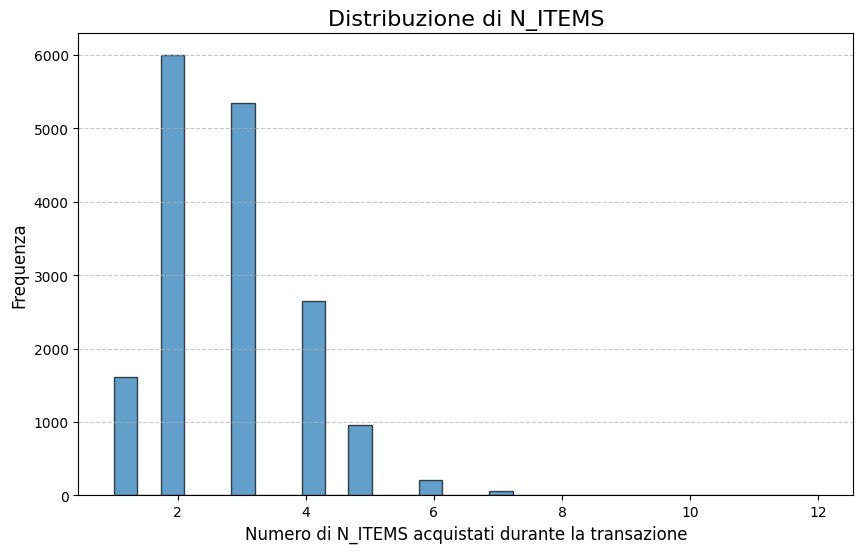

In [291]:
plt.figure(figsize=(10, 6))
df_train['N_ITEMS'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribuzione di N_ITEMS', fontsize=16)
plt.xlabel('Numero di N_ITEMS acquistati durante la transazione', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Media: 2.78
Mediana: 3.00
Deviazione Standard: 1.13
25° Percentile (Q1): 2.00
75° Percentile (Q3): 3.00
Intervallo Interquartile (IQR): 1.00
Valore Minimo: 1.00
Valore Massimo: 12.00
Numero di Outlier: 1248.00

Outliers per N_ITEMS:
       N_ITEMS
26           5
43           5
48           5
51           5
67           5
...        ...
17038        6
17049        5
17070        5
17083        5
17095        5

[1248 rows x 1 columns]


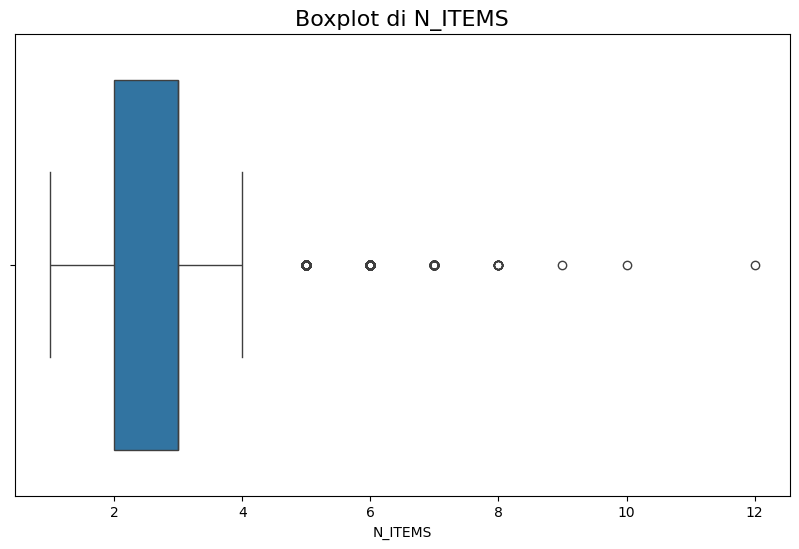

In [292]:
n_items = {
    'Media': df_train['N_ITEMS'].mean(),
    'Mediana': df_train['N_ITEMS'].median(),
    'Deviazione Standard': df_train['N_ITEMS'].std(),
    '25° Percentile (Q1)': df_train['N_ITEMS'].quantile(0.25),
    '75° Percentile (Q3)': df_train['N_ITEMS'].quantile(0.75),
    'Intervallo Interquartile (IQR)': df_train['N_ITEMS'].quantile(0.75) - df_train['N_ITEMS'].quantile(0.25),
    'Valore Minimo': df_train['N_ITEMS'].min(),
    'Valore Massimo': df_train['N_ITEMS'].max()
}

Q1 = n_items['25° Percentile (Q1)']
Q3 = n_items['75° Percentile (Q3)']
IQR = n_items['Intervallo Interquartile (IQR)']
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train['N_ITEMS'] < lower_bound) | (df_train['N_ITEMS'] > upper_bound)]
num_outliers = len(outliers)

n_items['Numero di Outlier'] = num_outliers

for stat, value in n_items.items():
    print(f"{stat}: {value:.2f}")

print("\nOutliers per N_ITEMS:")
print(outliers[['N_ITEMS']])

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['N_ITEMS'])
plt.title('Boxplot di N_ITEMS', fontsize=16)
plt.show()


Osservazioni:

- La maggior parte dei valori è compresa tra 2 e 3, con pochi valori significativamente superiori a questa fascia.
- Gli outlier costituiscono una parte significativa del dataset (1248 su ~17000 righe totali).
- La presenza di outlier verso l'alto (fino a 12) indica una coda destra nella distribuzione cioè una leggera asimmetria positiva.

Identifico gli outliers per l'analisi e conto quanti outliers ci sono per ciascuna categoria.

In [293]:
outliers = df_train[(df_train['N_ITEMS'] < lower_bound) | (df_train['N_ITEMS'] > upper_bound)]

In [294]:
outliers_per_category = outliers.groupby('N_ITEMS').size()
print(outliers_per_category)

N_ITEMS
5     963
6     215
7      58
8       9
9       1
10      1
12      1
dtype: int64


Osservo quanti outliers sono vicini alle promo e quanti invece non lo sono:

In [295]:
outliers_per_category = outliers.groupby('N_ITEMS').size()

outliers_vicino = outliers[outliers['DAYS_FROM_PROMO_BIN'] == 'Vicino']
outliers_lontano = outliers[outliers['DAYS_FROM_PROMO_BIN'] == 'Lontano']


outliers_table = pd.DataFrame({
    'N_ITEMS': outliers_per_category.index,
    'Total Outliers': outliers_per_category.values,
    'Vicino Outliers': outliers_vicino.groupby('N_ITEMS').size(),
    'Lontano Outliers': outliers_lontano.groupby('N_ITEMS').size()
}).fillna(0)


outliers_table[['Total Outliers', 'Vicino Outliers', 'Lontano Outliers']] = outliers_table[
    ['Total Outliers', 'Vicino Outliers', 'Lontano Outliers']
].astype(int)

print(outliers_table)


         N_ITEMS  Total Outliers  Vicino Outliers  Lontano Outliers
N_ITEMS                                                            
5              5             963              512               451
6              6             215              118                97
7              7              58               22                36
8              8               9                5                 4
9              9               1                1                 0
10            10               1                0                 1
12            12               1                1                 0


Non sapendo a quanto ammontano le promozioni supponiamo di tenere tutti gli outliers ritenuti  'vicino' ovvero al massimo a quindi giorni di distanza da una promozione. Li reputiamo soggetti ad una promozione, quindi anche se questi dovessero avere un prezzo basso non sarebbe un problema.
Ora visualizziamo quegli outliers che sono lontani dalla promozione e che hanno prop conbini pari a 0.0. Questo vuol dire che il cliente ha acqusitato solo manga.

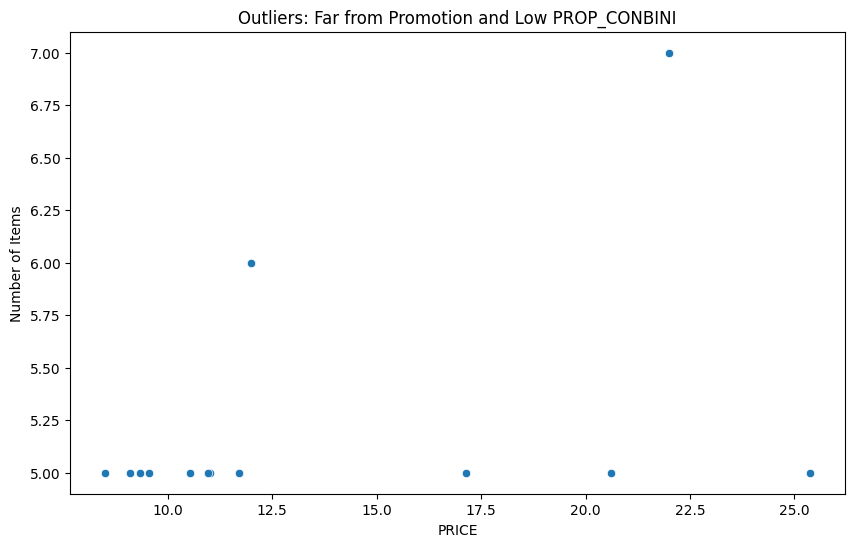

In [296]:
outliers_far_low_prop = outliers[
    (outliers['DAYS_FROM_PROMO_BIN'] == 'Lontano') &
    (outliers['PROP_CONBINI'].isin(['Basso']))
]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE', y='N_ITEMS', data=outliers_far_low_prop)
plt.title('Outliers: Far from Promotion and Low PROP_CONBINI')
plt.xlabel('PRICE')
plt.ylabel('Number of Items')
plt.show()

Nell'ipotesi estrema in cui il cliente abbia acquistato manca molto economici (sui 2 euro ad articolo), possiamo permetterci di scartare i seguenti outlier:

In [297]:
outliers_far_low_prop[((outliers_far_low_prop['DAYS_FROM_PROMO_BIN'] == 'Lontano') &
                     (outliers_far_low_prop['PROP_CONBINI'] == 'Basso') &
                     (outliers_far_low_prop['PRICE'] < 10))]

,PAID,POINT_OF_SALE,EVENT_ID,MONTH,N_SUBSCRIPTIONS,PRICE,PHONE_NUMBER,PROP_CONBINI,PAYMENT_TYPE,FAV_GENRE,...,DAYS_FROM_PROMO,BOOKS_PAID,N_TRANSACTIONS,N_ITEMS,DATE_LAST_PURCHASE,CUSTOMER_SINCE,MAIL,SUBSCR_CANC,MARGIN,DAYS_FROM_PROMO_BIN
782,0,BO,INN03095,8,0,9.32,0,Basso,Card,Shojo,...,30,7.0,3.0,5,26/04/2018,22/12/2017,0,0,77.968798,Lontano
6025,0,BO,INN04041,10,0,9.54,0,Basso,Card,Shojo,...,22,5.0,2.0,5,27/01/2018,18/07/2017,0,0,35.683908,Lontano
7788,0,MI,INN33886,4,0,9.10,0,Basso,Card,Shonen,...,30,NaN,NaN,5,01/01/0001,01/01/9999,0,0,NaN,Lontano
11244,0,BO,INN35858,9,0,8.50,0,Basso,Cash,Shonen,...,19,1.0,1.0,5,27/11/2017,27/11/2017,0,0,13.177886,Lontano


Scarto gli outliers dal dataframe df_train

In [298]:
mask = (
    (outliers_far_low_prop['DAYS_FROM_PROMO_BIN'] == 'Lontano') &
    (outliers_far_low_prop['PROP_CONBINI'] == 'Basso') &
    (outliers_far_low_prop['PRICE'] < 10)
)
aligned_mask = mask.reindex(df_train.index, fill_value=False)
df_train = df_train[~aligned_mask]


Elimino la colonna DAYS_FROM_PROMO_BIN

In [299]:
df_train.drop(columns='DAYS_FROM_PROMO_BIN', inplace=True)

<ipython-input-299-8d6bfd867ea5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns='DAYS_FROM_PROMO_BIN', inplace=True)


In [300]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16842 entries, 0 to 17098
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PAID                16842 non-null  int64   
 1   POINT_OF_SALE       16842 non-null  object  
 2   EVENT_ID            16842 non-null  object  
 3   MONTH               16842 non-null  int64   
 4   N_SUBSCRIPTIONS     16842 non-null  int64   
 5   PRICE               16842 non-null  float64 
 6   PHONE_NUMBER        16842 non-null  int64   
 7   PROP_CONBINI        16842 non-null  object  
 8   PAYMENT_TYPE        16842 non-null  object  
 9   FAV_GENRE           16842 non-null  object  
 10  AGE                 16842 non-null  category
 11  DAYS_FROM_PROMO     16842 non-null  int64   
 12  BOOKS_PAID          11329 non-null  float64 
 13  N_TRANSACTIONS      11329 non-null  float64 
 14  N_ITEMS             16842 non-null  int64   
 15  DATE_LAST_PURCHASE  16842 non-null  objec

# N_TRANSACTIONS

Visualizzo la distribuzione di N_TRANSACTIONS senza valori mancanti

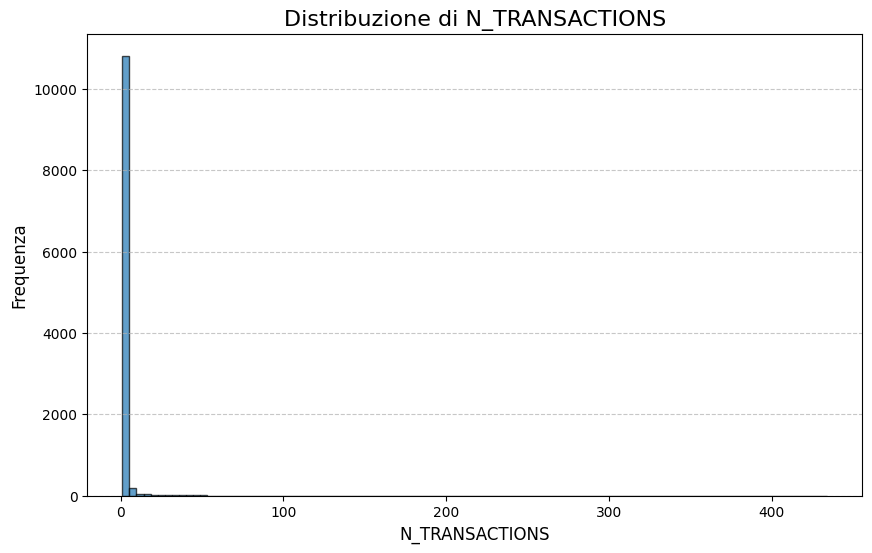

In [301]:
plt.figure(figsize=(10, 6))
df_train['N_TRANSACTIONS'].plot(kind='hist', bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribuzione di N_TRANSACTIONS', fontsize=16)
plt.xlabel('N_TRANSACTIONS', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La distribuzione appare spostata di molto verso sinistra, cioè asimmetrica.



Media: 3.33
Mediana: 1.00
Deviazione Standard: 14.19
25° Percentile (Q1): 1.00
75° Percentile (Q3): 2.00
Intervallo Interquartile (IQR): 1.00
Valore Minimo: 1.00
Valore Massimo: 434.00


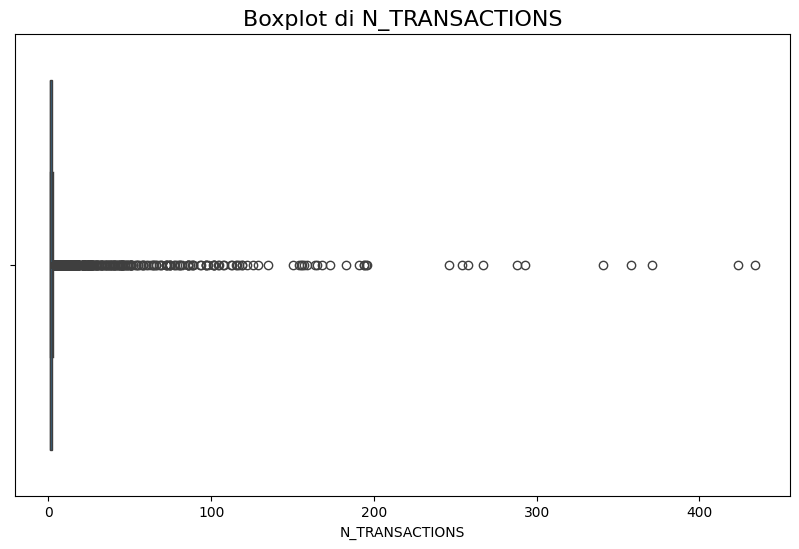

In [302]:
n_transactions_stats = {
    'Media': df_train['N_TRANSACTIONS'].mean(),
    'Mediana': df_train['N_TRANSACTIONS'].median(),
    'Deviazione Standard': df_train['N_TRANSACTIONS'].std(),
    '25° Percentile (Q1)': df_train['N_TRANSACTIONS'].quantile(0.25),
    '75° Percentile (Q3)': df_train['N_TRANSACTIONS'].quantile(0.75),
    'Intervallo Interquartile (IQR)': df_train['N_TRANSACTIONS'].quantile(0.75) - df_train['N_TRANSACTIONS'].quantile(0.25),
    'Valore Minimo': df_train['N_TRANSACTIONS'].min(),
    'Valore Massimo': df_train['N_TRANSACTIONS'].max()
}


Q1 = days_from_promo_stats['25° Percentile (Q1)']
Q3 = days_from_promo_stats['75° Percentile (Q3)']
IQR = days_from_promo_stats['Intervallo Interquartile (IQR)']
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train['N_TRANSACTIONS'] < lower_bound) | (df_train['N_TRANSACTIONS'] > upper_bound)]
num_outliers = len(outliers)

days_from_promo_stats['Numero di Outlier'] = num_outliers

for stat, value in n_transactions_stats.items():
    print(f"{stat}: {value:.2f}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['N_TRANSACTIONS'])
plt.title('Boxplot di N_TRANSACTIONS', fontsize=16)
plt.show()

Osservazioni:
- La media (3.33) è significativamente maggiore della mediana (1.00), il che indica una distribuzione asimmetrica positiva (skewed right). Questo suggerisce che esistono alcuni valori estremamente elevati (outlier) che aumentano la media rispetto alla mediana.
- La deviazione standard (14.19) è molto alta rispetto ai valori centrali (media e mediana), confermando una grande variabilità nei dati, probabilmente dovuta agli outlier.
- Il valore massimo (434.00) è estremamente superiore al 75° percentile (Q3), che è solo 2.00. Questo conferma la presenza di outlier significativi.
- La maggior parte dei dati è concentrata intorno ai valori bassi. Questo si deduce dal fatto che:
La mediana è 1.00, e anche il 25° percentile (Q1) è 1.00 mentre il 75° percentile (Q3) è solo 2.00.
Inoltre, l'intervallo interquartile (IQR), che rappresenta la dispersione centrale del 50% dei dati, è molto basso (1.00), indicando che i dati centrali sono raggruppati in un intervallo ristretto.
- La distribuzione suggerisce che la maggior parte dei clienti (o delle unità di osservazione) ha effettuato poche transazioni (1 o 2), mentre una minoranza ha effettuato un numero molto alto di transazioni.
Questo tipo di distribuzione indica che pochi clienti sono molto attivi e la maggior parte ha una partecipazione limitata.

Osservo gli outliers della variabile considerata

In [303]:
Q1 = df_train['N_TRANSACTIONS'].quantile(0.25)
Q3 = df_train['N_TRANSACTIONS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train['N_TRANSACTIONS'] < lower_bound) | (df_train['N_TRANSACTIONS'] > upper_bound)]

print("Outliers in N_TRANSACTIONS:")
print(outliers[['N_TRANSACTIONS']])

Outliers in N_TRANSACTIONS:
       N_TRANSACTIONS
14               10.0
23                7.0
29               26.0
33                7.0
40                4.0
...               ...
17027             4.0
17055            10.0
17058            37.0
17071             4.0
17074             4.0

[1152 rows x 1 columns]


considero solo gli outliers sopra l'upper bound:

In [304]:
outliers_upper_bound=df_train[df_train['N_TRANSACTIONS'] > upper_bound]

In [305]:
outliers_upper_bound['N_TRANSACTIONS']

,N_TRANSACTIONS
14,10.0
23,7.0
29,26.0
33,7.0
40,4.0
...,...
17027,4.0
17055,10.0
17058,37.0
17071,4.0


Da un' analisi preliminare ho riscontrato che le righe in cui N_TRANSACTIONS possiede NaN come valore corripondono alle righe non valide delle date in DATE_LAST_PURCHASE e CUSTOMER_SINCE. Pertanto escludendo queste righe e concentrandoci solo sui dati validi nelle due colonne, è possibile analizzare la frequenza del numero di transazioni attive per cliente e gestire gli outliers di N_TRANSACTIONS.

In [306]:
df_train = df_train.copy()

customer_since = df_train['CUSTOMER_SINCE'].value_counts(dropna=False)

print("Conteggio delle occorrenze per ogni categoria in customer_since:")
print(customer_since)

df_train['CUSTOMER_SINCE_ORIG'] = df_train['CUSTOMER_SINCE']

df_train['CUSTOMER_SINCE_ORIG'] = df_train['CUSTOMER_SINCE_ORIG'].astype(str).str.strip()

df_train['CUSTOMER_SINCE_ORIG'] = df_train['CUSTOMER_SINCE_ORIG'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

df_train.loc[df_train['CUSTOMER_SINCE_ORIG'] == 'nan', 'CUSTOMER_SINCE_ORIG'] = pd.NaT

df_train['CUSTOMER_SINCE'] = pd.to_datetime(
    df_train['CUSTOMER_SINCE_ORIG'],
    format='%d/%m/%Y',
    errors='coerce' , dayfirst=True
)

nat_rows = df_train[df_train['CUSTOMER_SINCE'].isna()]
print("Righe ancora NaT dopo la pulizia:")
print(nat_rows[['CUSTOMER_SINCE_ORIG', 'CUSTOMER_SINCE']])

print("\nCampione delle date pulite e convertite:")
print(df_train[['CUSTOMER_SINCE_ORIG', 'CUSTOMER_SINCE']].head())

df_train.drop(columns=['CUSTOMER_SINCE_ORIG'], inplace=True)

print("Righe con CUSTOMER_SINCE dopo la pulizia:")
print(df_train['CUSTOMER_SINCE'].isna().sum())

print("\nCampione della colonna CUSTOMER_SINCE pulita:")
print(df_train[['CUSTOMER_SINCE']].head())

date_last_purchase= df_train['DATE_LAST_PURCHASE'].value_counts(dropna=False)

print("Conteggio delle occorrenze per ogni categoria in date_last_purchase:")
print(date_last_purchase)

df_train['DATE_LAST_PURCHASE'] = pd.to_datetime(df_train['DATE_LAST_PURCHASE'], errors='coerce', dayfirst=True )

print("\nCampione della colonna DATE_LAST_PURCHASE pulita:")
print(df_train[['DATE_LAST_PURCHASE']].head())

df_train_valid = df_train[df_train['DATE_LAST_PURCHASE'].notnull() & df_train['CUSTOMER_SINCE'].notnull()]

Conteggio delle occorrenze per ogni categoria in customer_since:
CUSTOMER_SINCE
01/01/9999    5513
06/01/2018      49
24/02/2018      49
06/02/2018      49
27/02/2018      48
              ... 
27/07/2016       1
19/07/2015       1
12/09/2016       1
08/09/2016       1
25/09/2016       1
Name: count, Length: 916, dtype: int64
Righe ancora NaT dopo la pulizia:
      CUSTOMER_SINCE_ORIG CUSTOMER_SINCE
2              01/01/9999            NaT
4              01/01/9999            NaT
7              01/01/9999            NaT
9              01/01/9999            NaT
12             01/01/9999            NaT
...                   ...            ...
17090          01/01/9999            NaT
17091          01/01/9999            NaT
17094          01/01/9999            NaT
17095          01/01/9999            NaT
17096          01/01/9999            NaT

[5513 rows x 2 columns]

Campione delle date pulite e convertite:
  CUSTOMER_SINCE_ORIG CUSTOMER_SINCE
0          06/01/2018     2018-01-06
1    

Voglio vedere quelle righe in cui i valori mancanti non appaiono in tutte e tre le variabili CUSTOMER SINCE, DATE LAST PURCHASE e N_TRANSACTIONS contemporaneamnte


In [307]:
missing_rows = df_train[df_train['CUSTOMER_SINCE'].isnull() &
                        df_train['DATE_LAST_PURCHASE'].isnull() &
                        df_train['N_TRANSACTIONS'].isnull()]

df_filtered = df_train[~df_train.index.isin(missing_rows.index)]


valid_rows = df_train[df_train['CUSTOMER_SINCE'].notnull() &
                      df_train['DATE_LAST_PURCHASE'].notnull() &
                      df_train['N_TRANSACTIONS'].notnull()]

df_filtered_new = df_train[df_train.index.isin(valid_rows.index)]

df_difference = df_filtered_new[~df_filtered_new.index.isin(df_filtered.index)]

print(df_difference)

Empty DataFrame
Columns: [PAID, POINT_OF_SALE, EVENT_ID, MONTH, N_SUBSCRIPTIONS, PRICE, PHONE_NUMBER, PROP_CONBINI, PAYMENT_TYPE, FAV_GENRE, AGE, DAYS_FROM_PROMO, BOOKS_PAID, N_TRANSACTIONS, N_ITEMS, DATE_LAST_PURCHASE, CUSTOMER_SINCE, MAIL, SUBSCR_CANC, MARGIN]
Index: []


Questo risultato indica che i valori nulli sono esclusivamente condivisi tra le tre variabili considerate.

In [308]:
df_train['DATE_LAST_PURCHASE'].notnull().value_counts()

,count
DATE_LAST_PURCHASE,
True,11329
False,5513


In [309]:
df_train['CUSTOMER_SINCE'].notnull().value_counts()

,count
CUSTOMER_SINCE,
True,11329
False,5513


In [310]:
df_train['N_TRANSACTIONS'].notnull().value_counts()

,count
N_TRANSACTIONS,
True,11329
False,5513


Filtro df_train_valid mantenendo solo le righe che coincidono con outliers_upper_bound (prendo le righe che non hanno valori mancanti e in più che corrispondo agli outliers identificati per N_TRANSACTIONS). Il nuovo dataframe è df_train_valid_filtered.

In [311]:
df_train_valid_filtered = df_train_valid.copy()

In [312]:
df_train_valid_filtered = df_train_valid[df_train_valid['EVENT_ID'].isin(outliers_upper_bound['EVENT_ID'])].copy()

In [313]:
df_train_valid_filtered.loc[:, 'DAYS_BETWEEN_TRANSACTIONS'] = (
    df_train_valid_filtered['DATE_LAST_PURCHASE'] - df_train_valid_filtered['CUSTOMER_SINCE']
).dt.days

In [314]:
df_train_valid_filtered[
    (df_train_valid_filtered['DAYS_BETWEEN_TRANSACTIONS'] > 0) &
    ((df_train_valid_filtered['N_TRANSACTIONS'] / df_train_valid_filtered['DAYS_BETWEEN_TRANSACTIONS']) >= 1)
]

,PAID,POINT_OF_SALE,EVENT_ID,MONTH,N_SUBSCRIPTIONS,PRICE,PHONE_NUMBER,PROP_CONBINI,PAYMENT_TYPE,FAV_GENRE,...,DAYS_FROM_PROMO,BOOKS_PAID,N_TRANSACTIONS,N_ITEMS,DATE_LAST_PURCHASE,CUSTOMER_SINCE,MAIL,SUBSCR_CANC,MARGIN,DAYS_BETWEEN_TRANSACTIONS


Non ci sono frequenze inverosimili di transazioni. Considerando valida almeno una transazione al giorno, il numero di transazioni compiute dal cliente è coerente con il periodo temporale trascorso tra la prima e l'ultima transazione. Gli outliers pertanto possono essere considerati osservazioni valide.

Il numero di transazioni aumenta all'aumentare del numero di giorni tra la data dell'ultimo acquisto e quella di registrazione come cliente (DAYS_BETWEEN_TRANSACTIONS), come mostrato nel grafico seguente. Questo comportamento suggerisce che i clienti con una relazione più lunga con l'azienda tendono a effettuare un numero maggiore di transazioni, un risultato coerente con le aspettative.

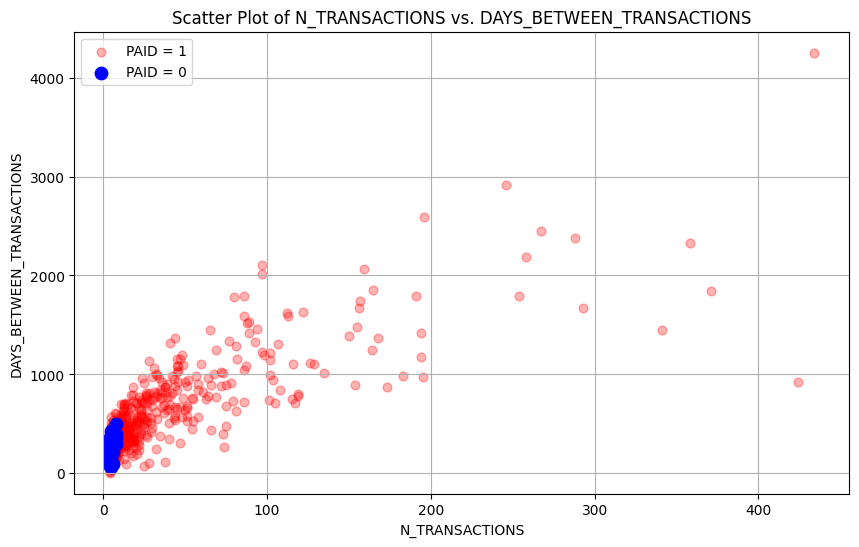

In [315]:
plt.figure(figsize=(10, 6))

plt.scatter(df_train_valid_filtered[df_train_valid_filtered['PAID'] == 1]['N_TRANSACTIONS'],
            df_train_valid_filtered[df_train_valid_filtered['PAID'] == 1]['DAYS_BETWEEN_TRANSACTIONS'],
            color='red', label='PAID = 1', alpha=0.3, s=40)


plt.scatter(df_train_valid_filtered[df_train_valid_filtered['PAID'] == 0]['N_TRANSACTIONS'],
            df_train_valid_filtered[df_train_valid_filtered['PAID'] == 0]['DAYS_BETWEEN_TRANSACTIONS'],
            color='blue', label='PAID = 0', alpha=1, s=80)

plt.xlabel('N_TRANSACTIONS')
plt.ylabel('DAYS_BETWEEN_TRANSACTIONS')
plt.title('Scatter Plot of N_TRANSACTIONS vs. DAYS_BETWEEN_TRANSACTIONS')
plt.legend()
plt.grid(True)
plt.show()

Dal grafico emerge chiaramente che i clienti che non hanno saldato (PAID=0) tendono ad avere un numero inferiore di transazioni e una relazione più breve con l'azienda, rispetto a quelli che hanno saldato (PAID=1). Al contrario, i clienti con una relazione più lunga e un numero maggiore di transazioni sono più frequentemente associati a PAID=1.

# BOOKS_PAID

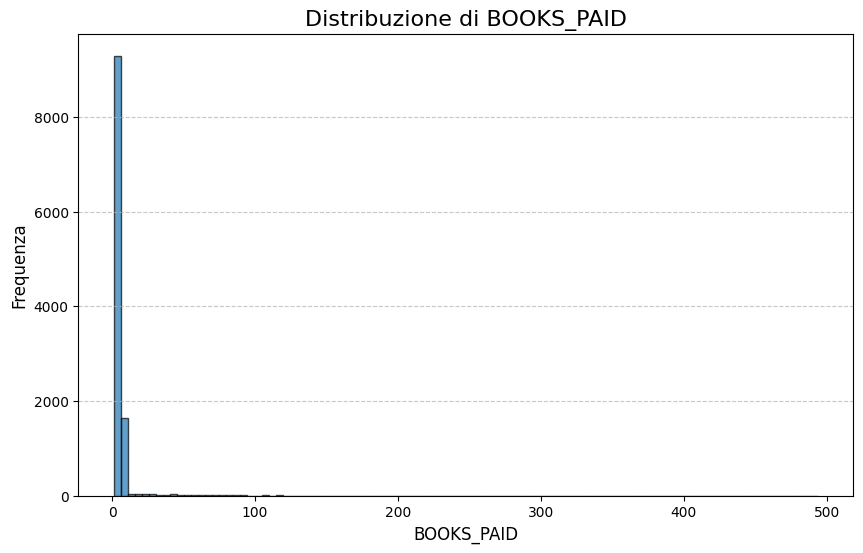

In [316]:
plt.figure(figsize=(10, 6))
df_train['BOOKS_PAID'].plot(kind='hist', bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribuzione di BOOKS_PAID', fontsize=16)
plt.xlabel('BOOKS_PAID', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Come nel caso di N_TRANSACTIONS, la distribuzione risulta fortemente asimmetrica.

Media: 6.02
Mediana: 3.00
Deviazione Standard: 23.30
25° Percentile (Q1): 1.00
75° Percentile (Q3): 5.00
Intervallo Interquartile (IQR): 4.00
Valore Minimo: 1.00
Valore Massimo: 494.00
Numero di Outlier: 390.00


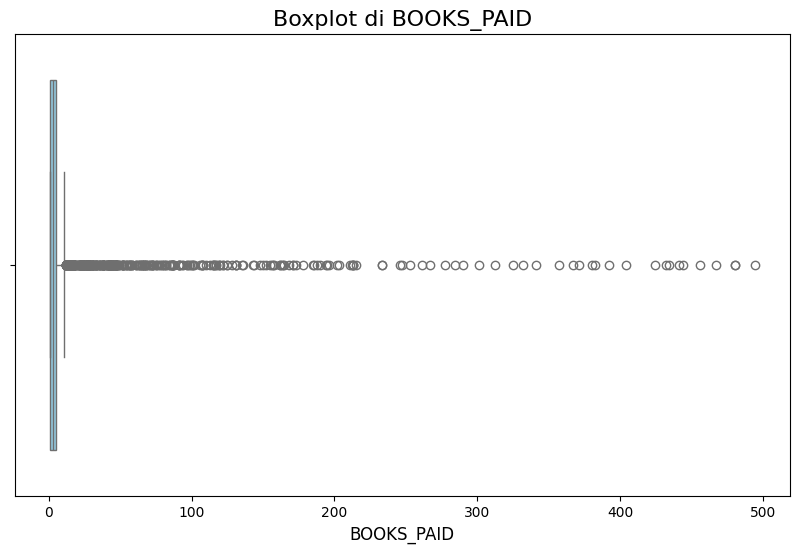

In [317]:
books_paid_stats = {
    'Media': df_train['BOOKS_PAID'].mean(),
    'Mediana': df_train['BOOKS_PAID'].median(),
    'Deviazione Standard': df_train['BOOKS_PAID'].std(),
    '25° Percentile (Q1)': df_train['BOOKS_PAID'].quantile(0.25),
    '75° Percentile (Q3)': df_train['BOOKS_PAID'].quantile(0.75),
    'Intervallo Interquartile (IQR)': df_train['BOOKS_PAID'].quantile(0.75) - df_train['BOOKS_PAID'].quantile(0.25),
    'Valore Minimo': df_train['BOOKS_PAID'].min(),
    'Valore Massimo': df_train['BOOKS_PAID'].max()
}

Q1 = books_paid_stats['25° Percentile (Q1)']
Q3 = books_paid_stats['75° Percentile (Q3)']
IQR = books_paid_stats['Intervallo Interquartile (IQR)']
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df_train[(df_train['BOOKS_PAID'] < lower_bound) | (df_train['BOOKS_PAID'] > upper_bound)]
num_outliers = len(outliers)


books_paid_stats['Numero di Outlier'] = num_outliers

for stat, value in books_paid_stats.items():
    print(f"{stat}: {value:.2f}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['BOOKS_PAID'], color="skyblue")
plt.title('Boxplot di BOOKS_PAID', fontsize=16)
plt.xlabel('BOOKS_PAID', fontsize=12)
plt.show()

Anche in questo caso valgono le stesse considerazioni fatte per la variabile precedente. Procedo dunque con gli stessi passaggi eseguiti per la variabile precedente.

In [318]:
Q1 = df_train['BOOKS_PAID'].quantile(0.25)
Q3 = df_train['BOOKS_PAID'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_upper_bound = df_train[df_train['BOOKS_PAID'] > upper_bound]
outliers_upper_bound['BOOKS_PAID']

missing_rows = df_train[df_train['CUSTOMER_SINCE'].isnull() &
                        df_train['DATE_LAST_PURCHASE'].isnull() &
                        df_train['BOOKS_PAID'].isnull()]

df_filtered = df_train[~df_train.index.isin(missing_rows.index)]

valid_rows = df_train[df_train['CUSTOMER_SINCE'].notnull() &
                      df_train['DATE_LAST_PURCHASE'].notnull() &
                      df_train['BOOKS_PAID'].notnull()]

df_filtered_new = df_train[df_train.index.isin(valid_rows.index)]

df_difference = df_filtered_new[~df_filtered_new.index.isin(df_filtered.index)]

print("Differenze tra i DataFrame filtrati per esaminare se ci sono NaN che non stanno nell'intersezione:")
print(df_difference)

df_train_valid_filtered = df_train_valid[df_train_valid['EVENT_ID'].isin(outliers_upper_bound['EVENT_ID'])].copy()

df_train_valid_filtered.loc[:, 'DAYS_BETWEEN_TRANSACTIONS'] = (
    df_train_valid_filtered['DATE_LAST_PURCHASE'] - df_train_valid_filtered['CUSTOMER_SINCE']
).dt.days

filtered_rows = df_train_valid_filtered[
    (df_train_valid_filtered['DAYS_BETWEEN_TRANSACTIONS'] > 0) &
    ((df_train_valid_filtered['BOOKS_PAID'] / df_train_valid_filtered['DAYS_BETWEEN_TRANSACTIONS']) >= 1)
]

print("Righe filtrate che soddisfano le condizioni su DAYS_BETWEEN_TRANSACTIONS e BOOKS_PAID:")
print(filtered_rows)


Differenze tra i DataFrame filtrati per esaminare se ci sono NaN che non stanno nell'intersezione:
Empty DataFrame
Columns: [PAID, POINT_OF_SALE, EVENT_ID, MONTH, N_SUBSCRIPTIONS, PRICE, PHONE_NUMBER, PROP_CONBINI, PAYMENT_TYPE, FAV_GENRE, AGE, DAYS_FROM_PROMO, BOOKS_PAID, N_TRANSACTIONS, N_ITEMS, DATE_LAST_PURCHASE, CUSTOMER_SINCE, MAIL, SUBSCR_CANC, MARGIN]
Index: []
Righe filtrate che soddisfano le condizioni su DAYS_BETWEEN_TRANSACTIONS e BOOKS_PAID:
Empty DataFrame
Columns: [PAID, POINT_OF_SALE, EVENT_ID, MONTH, N_SUBSCRIPTIONS, PRICE, PHONE_NUMBER, PROP_CONBINI, PAYMENT_TYPE, FAV_GENRE, AGE, DAYS_FROM_PROMO, BOOKS_PAID, N_TRANSACTIONS, N_ITEMS, DATE_LAST_PURCHASE, CUSTOMER_SINCE, MAIL, SUBSCR_CANC, MARGIN, DAYS_BETWEEN_TRANSACTIONS]
Index: []

[0 rows x 21 columns]


# MARGIN

Visualizzo la distribuzione della variabile MARGIN.

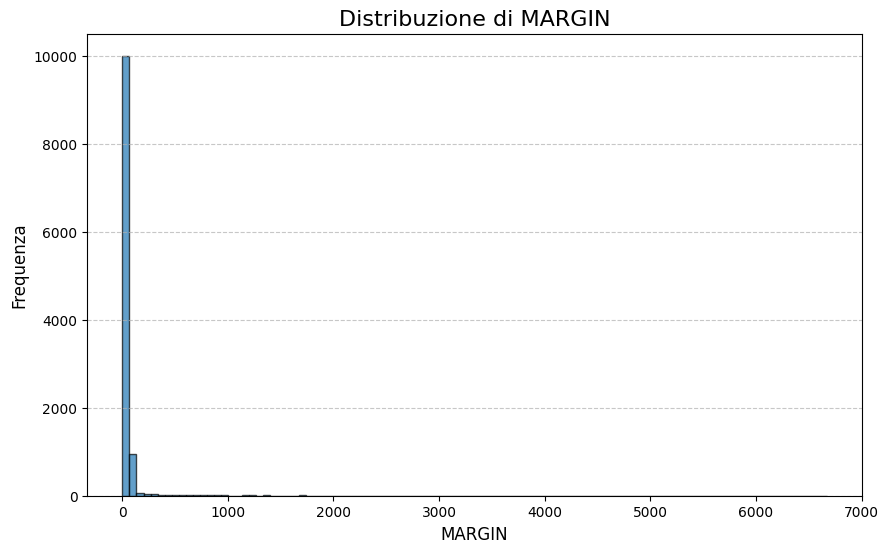

In [319]:
plt.figure(figsize=(10, 6))
df_train['MARGIN'].plot(kind='hist', bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribuzione di MARGIN', fontsize=16)
plt.xlabel('MARGIN', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Media: 62.73
Mediana: 28.84
Deviazione Standard: 253.54
25° Percentile (Q1): 13.37
75° Percentile (Q3): 51.06
Intervallo Interquartile (IQR): 37.68
Valore Minimo: 2.86
Valore Massimo: 6671.13
Numero di Outlier: 441.00


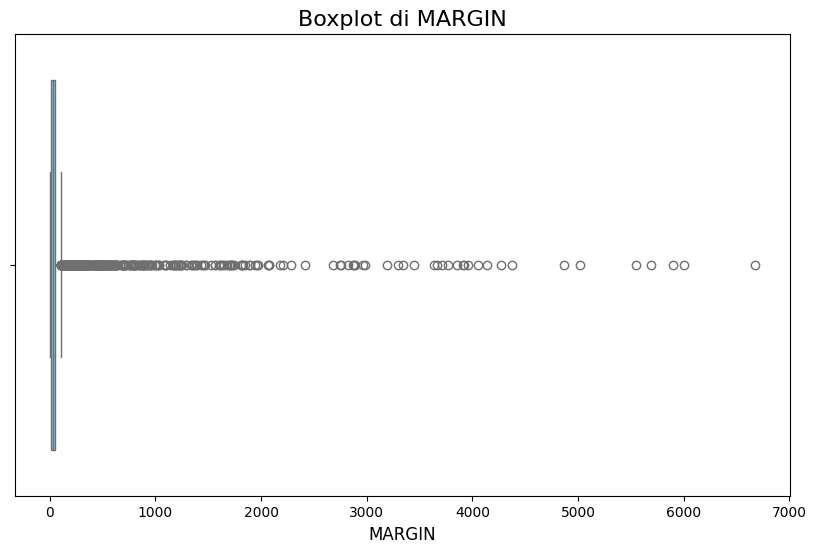

In [320]:
margin_stats = {
    'Media': df_train['MARGIN'].mean(),
    'Mediana': df_train['MARGIN'].median(),
    'Deviazione Standard': df_train['MARGIN'].std(),
    '25° Percentile (Q1)': df_train['MARGIN'].quantile(0.25),
    '75° Percentile (Q3)': df_train['MARGIN'].quantile(0.75),
    'Intervallo Interquartile (IQR)': df_train['MARGIN'].quantile(0.75) - df_train['MARGIN'].quantile(0.25),
    'Valore Minimo': df_train['MARGIN'].min(),
    'Valore Massimo': df_train['MARGIN'].max()
}

Q1 = margin_stats['25° Percentile (Q1)']
Q3 = margin_stats['75° Percentile (Q3)']
IQR = margin_stats['Intervallo Interquartile (IQR)']
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train['MARGIN'] < lower_bound) | (df_train['MARGIN'] > upper_bound)]
num_outliers = len(outliers)

margin_stats['Numero di Outlier'] = num_outliers

for stat, value in margin_stats.items():
    print(f"{stat}: {value:.2f}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['MARGIN'], color="skyblue")
plt.title('Boxplot di MARGIN', fontsize=16)
plt.xlabel('MARGIN', fontsize=12)
plt.show()

Anche in questo caso valgono le considerazioni fatte in precedenz per le due varibili BOOKS_PAID e N_TRANSACTIONS.

In [321]:
Q1 = df_train['MARGIN'].quantile(0.25)
Q3 = df_train['MARGIN'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_upper_bound = df_train[df_train['MARGIN'] > upper_bound]
outliers_upper_bound['MARGIN']

missing_rows = df_train[df_train['CUSTOMER_SINCE'].isnull() &
                        df_train['DATE_LAST_PURCHASE'].isnull() &
                        df_train['MARGIN'].isnull()]

df_filtered = df_train[~df_train.index.isin(missing_rows.index)]

valid_rows = df_train[df_train['CUSTOMER_SINCE'].notnull() &
                      df_train['DATE_LAST_PURCHASE'].notnull() &
                      df_train['MARGIN'].notnull()]

df_filtered_new = df_train[df_train.index.isin(valid_rows.index)]

df_difference = df_filtered_new[~df_filtered_new.index.isin(df_filtered.index)]

print("Differenze tra i DataFrame filtrati:")
print(df_difference)

df_train_valid_filtered = df_train_valid[df_train_valid['EVENT_ID'].isin(outliers_upper_bound['EVENT_ID'])].copy()

outliers = df_train[(df_train['MARGIN'] < lower_bound) | (df_train['MARGIN'] > upper_bound)]

print("Outliers per la variabile MARGIN:")
print(outliers[['MARGIN']])

df_train_valid_filtered.loc[:, 'DAYS_BETWEEN_TRANSACTIONS'] = (
    df_train_valid['DATE_LAST_PURCHASE'] - df_train_valid['CUSTOMER_SINCE']
).dt.days


Differenze tra i DataFrame filtrati:
Empty DataFrame
Columns: [PAID, POINT_OF_SALE, EVENT_ID, MONTH, N_SUBSCRIPTIONS, PRICE, PHONE_NUMBER, PROP_CONBINI, PAYMENT_TYPE, FAV_GENRE, AGE, DAYS_FROM_PROMO, BOOKS_PAID, N_TRANSACTIONS, N_ITEMS, DATE_LAST_PURCHASE, CUSTOMER_SINCE, MAIL, SUBSCR_CANC, MARGIN]
Index: []
Outliers per la variabile MARGIN:
            MARGIN
14      311.967174
29      199.438610
33      283.877080
50     3923.198693
105     220.254945
...            ...
16945   329.726606
16972  1007.528740
17019   380.688830
17055   242.079048
17058  1251.244355

[441 rows x 1 columns]


Non disponendo della distribuzione dei prezzi delle transazioni passate, non possiamo stabilire con certezza se i valori della variabile margine identificati come outlier siano realmente tali. Senza conoscere i prezzi unitari delle transazioni, potrebbe essere difficile distinguere se un margine è anomalo per un numero specifico di transazioni o se il rapporto è semplicemente dovuto a variazioni di prezzo legittime.

Plot di MARGIN vs N_TRANSACTIONS per investigare  visivamente gli outliers della variabile MARGIN:

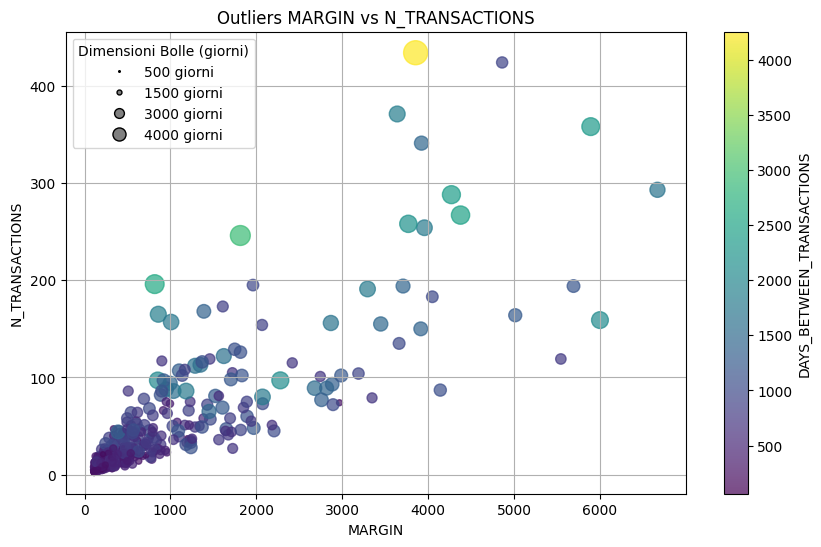

In [322]:
bubble_sizes = df_train_valid_filtered['DAYS_BETWEEN_TRANSACTIONS']
normalized_sizes = (bubble_sizes / bubble_sizes.max()) * 300

plt.figure(figsize=(10, 6))


scatter = plt.scatter(
    df_train_valid_filtered['MARGIN'],
    df_train_valid_filtered['N_TRANSACTIONS'],
    s=normalized_sizes,
    c=bubble_sizes,
    cmap='viridis',
    alpha=0.7
)

plt.xlabel('MARGIN')
plt.ylabel('N_TRANSACTIONS')
plt.title('Outliers MARGIN vs N_TRANSACTIONS')
plt.grid(True)

cbar = plt.colorbar(scatter)
cbar.set_label('DAYS_BETWEEN_TRANSACTIONS')


legend_sizes = [500, 1500, 3000, 4000]
legend_labels = [f"{size} giorni" for size in legend_sizes]
legend_elements = [
    mlines.Line2D([], [], marker='o', color='none', markerfacecolor='gray', markersize=(size / bubble_sizes.max()) * 10, label=label)
    for size, label in zip(legend_sizes, legend_labels)
]
plt.legend(handles=legend_elements, title="Dimensioni Bolle (giorni)", loc="upper left")

plt.show()



In generale, pur riconoscendo la possibile presenza di eteroschedasticità, che sarà analizzata successivamente, si osserva che all'aumentare di MARGIN cresce anche il numero di N_TRANSACTIONS. Contestualmente, il tempo trascorso tra la prima e l'ultima transazione tende ad aumentare. Pertanto, gli outlier non vengono esclusi, in quanto potrebbero rappresentare transazioni particolarmente redditizie effettuate dai clienti nel corso degli anni.

In [323]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16842 entries, 0 to 17098
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PAID                16842 non-null  int64         
 1   POINT_OF_SALE       16842 non-null  object        
 2   EVENT_ID            16842 non-null  object        
 3   MONTH               16842 non-null  int64         
 4   N_SUBSCRIPTIONS     16842 non-null  int64         
 5   PRICE               16842 non-null  float64       
 6   PHONE_NUMBER        16842 non-null  int64         
 7   PROP_CONBINI        16842 non-null  object        
 8   PAYMENT_TYPE        16842 non-null  object        
 9   FAV_GENRE           16842 non-null  object        
 10  AGE                 16842 non-null  category      
 11  DAYS_FROM_PROMO     16842 non-null  int64         
 12  BOOKS_PAID          11329 non-null  float64       
 13  N_TRANSACTIONS      11329 non-null  float64       


In [324]:
df_train['SUBSCR_CANC'].value_counts()

,count
SUBSCR_CANC,
0,14338
1,1502
2,625
3,294
4,53
5,30


In [325]:
df_train['DAYS_FROM_PROMO'].value_counts()

,count
DAYS_FROM_PROMO,
2,1133
3,1053
29,952
30,912
28,876
1,793
4,789
27,705
5,549


Dopo aver analizzato i dati numerici relativi alle variabili N_TRANSACTIONS, BOOKS_PAID e MARGIN, passiamo ora a esaminare i valori mancanti. Dai passaggi precedenti, abbiamo osservato che tutti e i soli valori mancanti sono comuni a tutte e tre le variabili: quando MARGIN è NaN, anche N_TRANSACTIONS e BOOKS_PAID risultano NaN.

Lo scopo del codice seguente è quello di simulare i valori mancanti in un dataset per testare l'efficacia dei metodi di imputazione.
Valuta diversi metodi di imputazione in base a MAE e RMSE, identificando quale metodo fornisce risultati migliori e poi mostra i risultati per guidare la scelta del metodo di imputazione più adatto per il nostro dataset.

In [327]:
# Simulare valori mancanti
def simulate_missing_data(df, missing_rate=0.3):
    df_missing = df.copy()
    np.random.seed(42)
    for col in df.columns:
        mask = np.random.rand(len(df)) < missing_rate
        df_missing.loc[mask, col] = np.nan
    return df_missing

# Funzione per valutare i metodi di imputazione
def evaluate_imputation_methods(df_original, df_missing):
    """
    Valuta i metodi di imputazione confrontando con i valori originali noti.
    """
    methods = {
        'mean': SimpleImputer(strategy='mean'),
        'median': SimpleImputer(strategy='median'),
        'knn': KNNImputer(n_neighbors=5),
        'iterative': IterativeImputer(max_iter=10, random_state=0)
    }

    results = []
    for method_name, imputer in methods.items():
        df_imputed = df_missing.copy()

        for col in df_original.columns:
            if df_original[col].dtype in ['int64', 'float64']:
                # Imputa solo colonne numeriche
                imputer.fit(df_missing[[col]])
                df_imputed[col] = imputer.transform(df_missing[[col]])

        # Allineare e confrontare solo le righe originali non mancanti
        mask_not_missing = df_original.notnull().all(axis=1)
        mae = mean_absolute_error(df_original[mask_not_missing], df_imputed[mask_not_missing])
        rmse = np.sqrt(mean_squared_error(df_original[mask_not_missing], df_imputed[mask_not_missing]))

        results.append((method_name, mae, rmse))

    return pd.DataFrame(results, columns=['Method', 'MAE', 'RMSE'])

# Rimuovi i valori mancanti dal dataset originale
df_original_clean = df_train[['BOOKS_PAID', 'N_TRANSACTIONS', 'MARGIN']].dropna()

# Simula valori mancanti
df_missing = simulate_missing_data(df_original_clean)

# Valuta i metodi di imputazione
results = evaluate_imputation_methods(df_original_clean, df_missing)

# Mostra i risultati
print("Risultati della valutazione dei metodi di imputazione:")
print(results)


Risultati della valutazione dei metodi di imputazione:
      Method       MAE       RMSE
0       mean  7.065700  81.067045
1     median  5.485696  81.809445
2        knn  7.065700  81.067045
3  iterative  7.065700  81.067045


Il MAE più basso del metodo median potrebbe indicare che la mediana è più robusta rispetto alla presenza di valori estremi, imputando valori più rappresentativi rispetto agli altri metodi.


In [328]:
def advanced_missing_value_imputation(df, method='knn'):
    """
    Imputa i valori mancanti utilizzando diversi metodi.
    Arrotonda specifiche colonne all'intero successivo.
    """
    # Separare le colonne numeriche e categoriche
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    # Seleziona l'imputer in base al metodo
    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif method == 'median':
        imputer = SimpleImputer(strategy='median')
    elif method == 'knn':
        imputer = KNNImputer(n_neighbors=5)
    elif method == 'iterative':
        imputer = IterativeImputer(max_iter=10, random_state=0)
    else:
        raise ValueError("Metodo non supportato. Scegli tra 'mean', 'median', 'knn', 'iterative'.")

    # Standardizzare solo le colonne numeriche per KNN e Iterative
    scaler = StandardScaler()
    if len(num_cols) > 0:
        scaled_data = scaler.fit_transform(df[num_cols])
    else:
        scaled_data = df[num_cols].values

    # Copia del DataFrame per l'imputazione
    df_imputed = df.copy()

    # Imputazione per le colonne numeriche
    if len(num_cols) > 0:
        imputed_data = imputer.fit_transform(scaled_data)
        df_imputed[num_cols] = scaler.inverse_transform(imputed_data)

    # Arrotonda le colonne specifiche all'intero successivo
    columns_to_round = ['N_TRANSACTIONS', 'BOOKS_PAID']  # Specifica le colonne da arrotondare
    for col in columns_to_round:
        if col in df_imputed.columns:
            df_imputed[col] = np.ceil(df_imputed[col]).astype(int)

    return df_imputed

df_cleaned = advanced_missing_value_imputation(df_train, method='median')  # Sostituisci 'mean' con 'median', 'knn', o 'iterative'
df_train = df_cleaned

# Controllo finale
print("Valori mancanti dopo l'imputazione:")
print(df_cleaned.isnull().sum())

# Verifica che N_TRANSACTIONS e BOOKS_PAID siano arrotondati all'intero successivo
print("\nDati arrotondati all'intero successivo:")
print(df_cleaned[['N_TRANSACTIONS', 'BOOKS_PAID']].head(10))

Valori mancanti dopo l'imputazione:
PAID                     0
POINT_OF_SALE            0
EVENT_ID                 0
MONTH                    0
N_SUBSCRIPTIONS          0
PRICE                    0
PHONE_NUMBER             0
PROP_CONBINI             0
PAYMENT_TYPE             0
FAV_GENRE                0
AGE                      0
DAYS_FROM_PROMO          0
BOOKS_PAID               0
N_TRANSACTIONS           0
N_ITEMS                  0
DATE_LAST_PURCHASE    5513
CUSTOMER_SINCE        5513
MAIL                     0
SUBSCR_CANC              0
MARGIN                   0
dtype: int64

Dati arrotondati all'intero successivo:
   N_TRANSACTIONS  BOOKS_PAID
0               3           8
1               2           5
2               1           3
3               1           1
4               1           3
5               1           1
6               2           3
7               1           3
8               1           3
9               1           3


In [329]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16842 entries, 0 to 17098
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PAID                16842 non-null  float64       
 1   POINT_OF_SALE       16842 non-null  object        
 2   EVENT_ID            16842 non-null  object        
 3   MONTH               16842 non-null  float64       
 4   N_SUBSCRIPTIONS     16842 non-null  float64       
 5   PRICE               16842 non-null  float64       
 6   PHONE_NUMBER        16842 non-null  float64       
 7   PROP_CONBINI        16842 non-null  object        
 8   PAYMENT_TYPE        16842 non-null  object        
 9   FAV_GENRE           16842 non-null  object        
 10  AGE                 16842 non-null  category      
 11  DAYS_FROM_PROMO     16842 non-null  float64       
 12  BOOKS_PAID          16842 non-null  int64         
 13  N_TRANSACTIONS      16842 non-null  int64         


Converto le varibili che prima erano interi di nuovo in interi

In [334]:
df_train['MONTH'] = df_train['MONTH'].astype(int)
df_train['N_SUBSCRIPTIONS'] = df_train['N_SUBSCRIPTIONS'].astype(int)
df_train['PHONE_NUMBER'] = df_train['PHONE_NUMBER'].astype(int)
df_train['N_ITEMS'] = df_train['N_ITEMS'].astype(int)
df_train['DAYS_FROM_PROMO'] = df_train['DAYS_FROM_PROMO'].astype(int)
df_train['MAIL'] = df_train['MAIL'].astype(int)
df_train['SUBSCR_CANC'] = df_train['SUBSCR_CANC'].astype(int)

# DATE_LAST_PURCHASE

Dall'analisi precedente sappiamo già che il numero di date mancanti è 5513 e corrisponde al numero di date mancanti di CUSTOMER_SINCE. Eseguiamo un'analisi desccrittiva preliminare sulla distribuzione DATE_LAST_PURCHASE

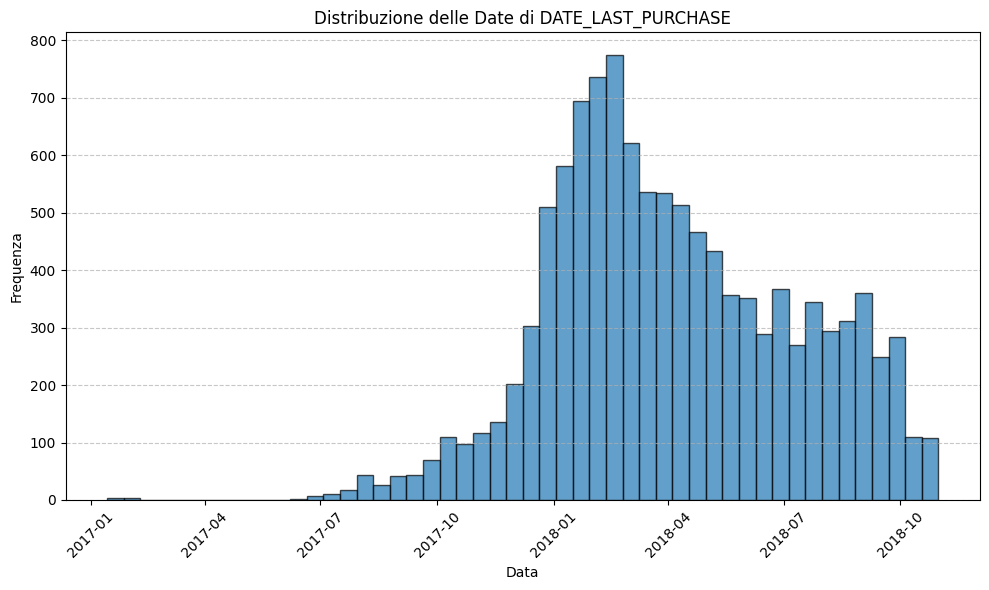

In [335]:
valid_dates = df_train['DATE_LAST_PURCHASE'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(valid_dates, bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribuzione delle Date di DATE_LAST_PURCHASE")
plt.xlabel("Data")
plt.ylabel("Frequenza")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

Facciamo un'analisi descrittiva:

In [336]:
valid_dates = df_train['DATE_LAST_PURCHASE'].dropna()

min_date = valid_dates.min()
max_date = valid_dates.max()
median_date = valid_dates.median()
mean_date = valid_dates.mean()
date_range = max_date - min_date

def print_statistics():
    print("Statistiche Descrittive delle Date (esclusi i valori mancanti):")
    print(f"Data minima: {min_date}")
    print(f"Data massima: {max_date}")
    print(f"Data mediana: {median_date}")
    print(f"Media delle date: {mean_date.date()}")
    print(f"Intervallo di date: {date_range}")

print_statistics()

Statistiche Descrittive delle Date (esclusi i valori mancanti):
Data minima: 2017-01-14 00:00:00
Data massima: 2018-10-31 00:00:00
Data mediana: 2018-03-22 00:00:00
Media delle date: 2018-04-03
Intervallo di date: 655 days 00:00:00


Decido di imputare i dati mancanti usando un'estrazione ponderata. In questo modo:
- Rispetto la distribuzione reale delle date nel dataset, mantenendo le proporzioni dei periodi più o meno frequenti.

In [337]:
valid_dates = df_train['DATE_LAST_PURCHASE'].dropna()

date_frequencies = valid_dates.value_counts(normalize=True)

def weighted_imputation(x):
    if pd.notnull(x):
        return x
    else:
        return choice(date_frequencies.index, p=date_frequencies.values)

df_train['DATE_LAST_PURCHASE'] = df_train['DATE_LAST_PURCHASE'].apply(weighted_imputation)

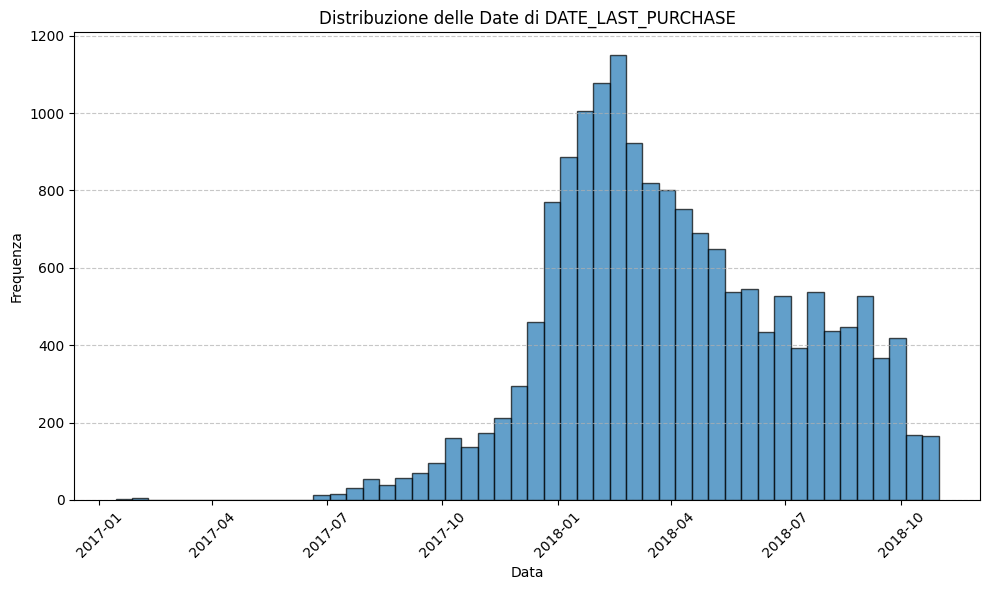

In [338]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['DATE_LAST_PURCHASE'] , bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribuzione delle Date di DATE_LAST_PURCHASE")
plt.xlabel("Data")
plt.ylabel("Frequenza")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

In questo modo ho mantenuto la forma della distribuzione.

# CUSTOMER_SINCE

Creiamo un istogramma delle date

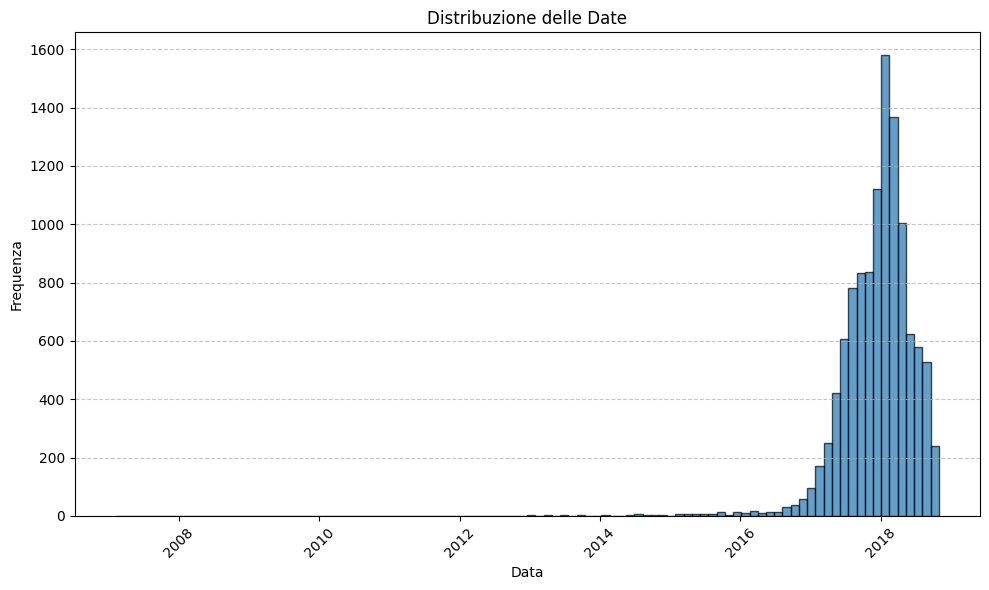

In [339]:
valid_dates = df_train['CUSTOMER_SINCE'].dropna()
plt.figure(figsize=(10, 6))
plt.hist(valid_dates, bins=100, edgecolor='black', alpha=0.7)
plt.title("Distribuzione delle Date")
plt.xlabel("Data")
plt.ylabel("Frequenza")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

In [340]:
min_date = valid_dates.min()
max_date = valid_dates.max()
median_date = valid_dates.median()
mean_date = valid_dates.mean()
date_range = max_date - min_date

def print_statistics():
    print("Statistiche Descrittive delle Date (esclusi i valori mancanti):")
    print(f"Data minima: {min_date}")
    print(f"Data massima: {max_date}")
    print(f"Data mediana: {median_date}")
    print(f"Media delle date: {mean_date.date()}")
    print(f"Intervallo di date: {date_range}")

print_statistics()

Statistiche Descrittive delle Date (esclusi i valori mancanti):
Data minima: 2007-02-06 00:00:00
Data massima: 2018-10-31 00:00:00
Data mediana: 2018-01-11 00:00:00
Media delle date: 2017-12-12
Intervallo di date: 4285 days 00:00:00


La mediana è leggermente più vecchia nella nuova serie (2018-01-11) rispetto alla precedente (2018-03-22). Questo indica che, nonostante l'aggiunta di date più remote, i valori centrali non si sono spostati troppo.
La media della nuova serie (2017-12-12) è più vecchia rispetto alla precedente (2018-04-03). Questo riflette la presenza di molte più date storiche nella nuova serie, che abbassano la media.

Decido di imputare i valori mancanti esattamente come ho fatto per la variabile DATE_LAST_PURCHASE:

In [341]:
valid_dates = df_train['CUSTOMER_SINCE'].dropna()
date_frequencies = valid_dates.value_counts(normalize=True)

imputed_mask = df_train['CUSTOMER_SINCE'].isna()

np.random.seed(42)
df_train.loc[imputed_mask, 'CUSTOMER_SINCE'] = choice(
    date_frequencies.index,
    size=imputed_mask.sum(),
    p=date_frequencies.values
)

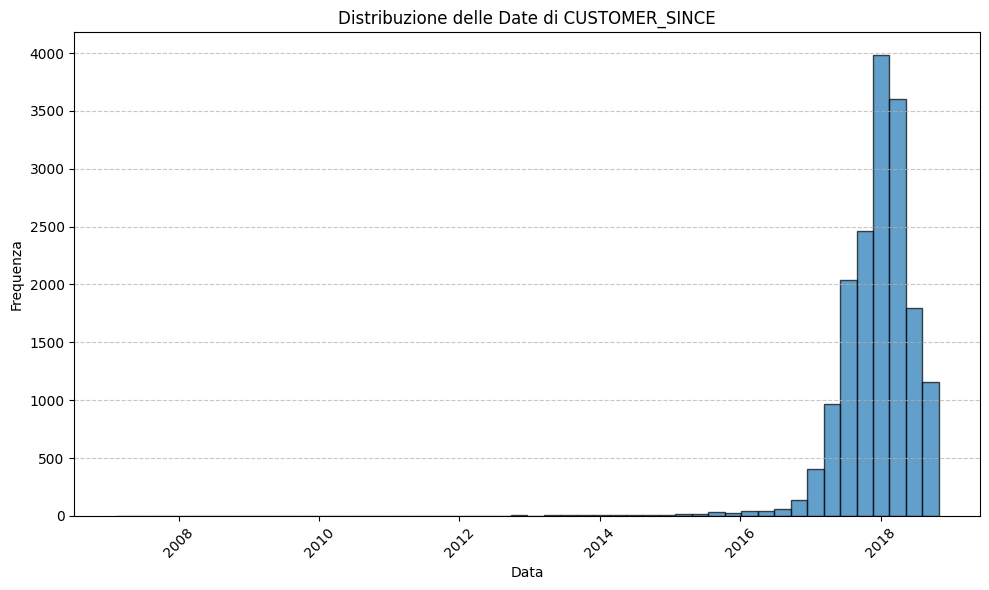

In [342]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['CUSTOMER_SINCE'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribuzione delle Date di CUSTOMER_SINCE")
plt.xlabel("Data")
plt.ylabel("Frequenza")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

Voglio compattare le informazioni delle due variabili DATE_LAST_PURCHASE e CUSTOMER_SINCE in un'unica variabile, pertanto creo DAYS_BETWEEN_TRANSACTIONS.

Controllo se le differenze tra le due variabili sono negative.

In [343]:
negative_days = df_train[df_train['DATE_LAST_PURCHASE'] < df_train['CUSTOMER_SINCE']]

imputed_negative_days = negative_days.loc[imputed_mask]

print("Numero totale di righe in negative_days:", len(negative_days))
print("Numero di righe imputate in negative_days:", len(imputed_negative_days))

Numero totale di righe in negative_days: 1682
Numero di righe imputate in negative_days: 1682


Creo la nuova colonna DAYS_BETWEEN_TRANSACTIONS:

In [344]:
df_train['DAYS_BETWEEN_TRANSACTIONS'] = (df_train['DATE_LAST_PURCHASE'] - df_train['CUSTOMER_SINCE']).dt.days

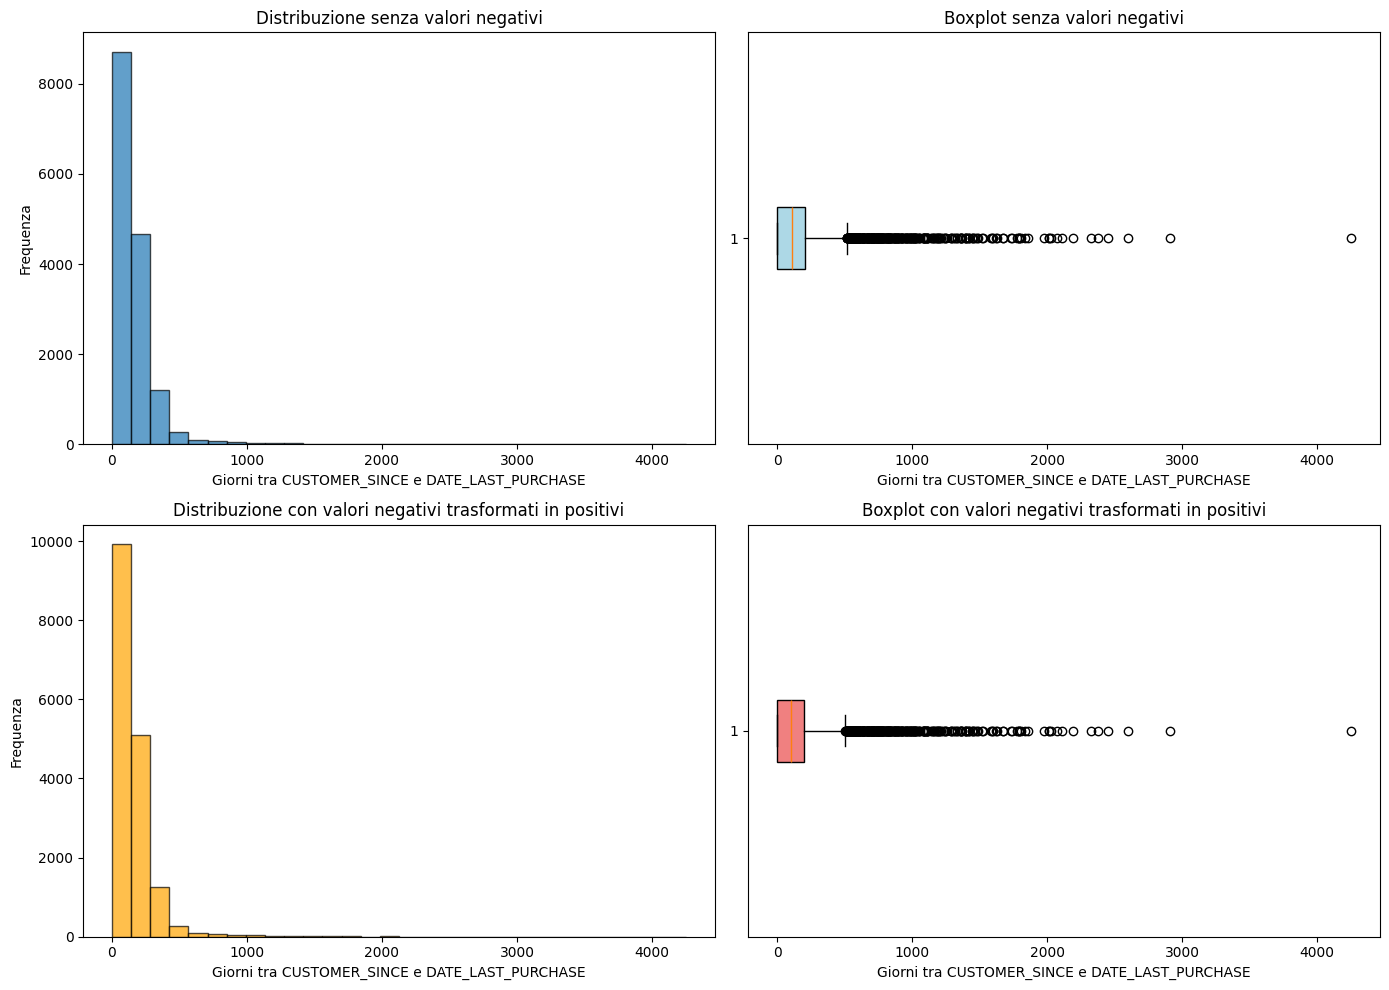

In [345]:
no_negatives = df_train[df_train['DAYS_BETWEEN_TRANSACTIONS'] >= 0]['DAYS_BETWEEN_TRANSACTIONS']

all_positive = df_train['DAYS_BETWEEN_TRANSACTIONS'].abs()

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.hist(no_negatives, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribuzione senza valori negativi")
plt.xlabel("Giorni tra CUSTOMER_SINCE e DATE_LAST_PURCHASE")
plt.ylabel("Frequenza")

plt.subplot(2, 2, 2)
plt.boxplot(no_negatives, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot senza valori negativi")
plt.xlabel("Giorni tra CUSTOMER_SINCE e DATE_LAST_PURCHASE")

plt.subplot(2, 2, 3)
plt.hist(all_positive, bins=30, edgecolor='k', alpha=0.7, color='orange')
plt.title("Distribuzione con valori negativi trasformati in positivi")
plt.xlabel("Giorni tra CUSTOMER_SINCE e DATE_LAST_PURCHASE")
plt.ylabel("Frequenza")

plt.subplot(2, 2, 4)
plt.boxplot(all_positive, vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title("Boxplot con valori negativi trasformati in positivi")
plt.xlabel("Giorni tra CUSTOMER_SINCE e DATE_LAST_PURCHASE")

plt.tight_layout()
plt.show()


Poiché le due distribuzioni mostrano comportamenti simili, si decide di trattare i valori negativi (derivanti dall'imputazione) come positivi, convertendoli al loro valore assoluto.

In [346]:
df_train['DAYS_BETWEEN_TRANSACTIONS']=df_train['DAYS_BETWEEN_TRANSACTIONS'].abs()

Verifico che non ci siano più valori negativi

In [347]:
df_train[df_train['DAYS_BETWEEN_TRANSACTIONS'] < 0]

,PAID,POINT_OF_SALE,EVENT_ID,MONTH,N_SUBSCRIPTIONS,PRICE,PHONE_NUMBER,PROP_CONBINI,PAYMENT_TYPE,FAV_GENRE,...,DAYS_FROM_PROMO,BOOKS_PAID,N_TRANSACTIONS,N_ITEMS,DATE_LAST_PURCHASE,CUSTOMER_SINCE,MAIL,SUBSCR_CANC,MARGIN,DAYS_BETWEEN_TRANSACTIONS


In [348]:
df_train['DAYS_BETWEEN_TRANSACTIONS'].head()

,DAYS_BETWEEN_TRANSACTIONS
0,111
1,217
2,152
3,0
4,363


Elimino le colonne originali che non sono più necessarie

In [349]:
df_train = df_train.drop(columns=['DATE_LAST_PURCHASE', 'CUSTOMER_SINCE'])

In [350]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16842 entries, 0 to 17098
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PAID                       16842 non-null  float64 
 1   POINT_OF_SALE              16842 non-null  object  
 2   EVENT_ID                   16842 non-null  object  
 3   MONTH                      16842 non-null  int64   
 4   N_SUBSCRIPTIONS            16842 non-null  int64   
 5   PRICE                      16842 non-null  float64 
 6   PHONE_NUMBER               16842 non-null  int64   
 7   PROP_CONBINI               16842 non-null  object  
 8   PAYMENT_TYPE               16842 non-null  object  
 9   FAV_GENRE                  16842 non-null  object  
 10  AGE                        16842 non-null  category
 11  DAYS_FROM_PROMO            16842 non-null  int64   
 12  BOOKS_PAID                 16842 non-null  int64   
 13  N_TRANSACTIONS             16842 non

# ENCODING DELLE VARIBILI CATEGORICHE E DELLE NUMERICHE SUDDIVISE IN BIN

Applico One hot engoding

In [351]:
columns_to_encode = ['POINT_OF_SALE', 'PAYMENT_TYPE', 'FAV_GENRE', 'AGE', 'PROP_CONBINI']

df_train = pd.get_dummies(df_train, columns=columns_to_encode, prefix=columns_to_encode, drop_first=False)

df_train

,PAID,EVENT_ID,MONTH,N_SUBSCRIPTIONS,PRICE,PHONE_NUMBER,DAYS_FROM_PROMO,BOOKS_PAID,N_TRANSACTIONS,N_ITEMS,...,PAYMENT_TYPE_Cash,PAYMENT_TYPE_Coupon,FAV_GENRE_Shojo,FAV_GENRE_Shonen,AGE_<10–14,AGE_15–21,AGE_22–30+,PROP_CONBINI_Alto,PROP_CONBINI_Basso,PROP_CONBINI_Medio
0,1.0,INN11033,7,1,10.99,0,1,8,3,2,...,False,False,False,True,False,True,False,False,True,False
1,1.0,INN16891,9,1,13.30,0,20,5,2,4,...,True,False,False,True,False,True,False,False,False,True
2,1.0,INN12365,5,2,18.79,0,6,3,1,3,...,False,False,False,True,False,False,True,False,True,False
3,1.0,INN15825,4,0,7.96,0,1,1,1,2,...,False,False,False,True,False,True,False,False,True,False
4,1.0,INN32532,6,0,12.00,0,1,3,1,3,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17094,0.0,INN09141,10,0,16.84,0,26,3,1,2,...,False,False,False,True,False,True,False,False,True,False
17095,1.0,INN09200,8,2,18.18,0,30,3,1,5,...,False,False,False,True,False,True,False,False,False,True
17096,1.0,INN15113,1,3,8.41,0,28,3,1,3,...,True,False,False,True,False,True,False,False,True,False
17097,1.0,INN14162,3,0,7.50,0,1,1,1,2,...,False,False,False,True,False,False,True,True,False,False


In [352]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16842 entries, 0 to 17098
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PAID                       16842 non-null  float64
 1   EVENT_ID                   16842 non-null  object 
 2   MONTH                      16842 non-null  int64  
 3   N_SUBSCRIPTIONS            16842 non-null  int64  
 4   PRICE                      16842 non-null  float64
 5   PHONE_NUMBER               16842 non-null  int64  
 6   DAYS_FROM_PROMO            16842 non-null  int64  
 7   BOOKS_PAID                 16842 non-null  int64  
 8   N_TRANSACTIONS             16842 non-null  int64  
 9   N_ITEMS                    16842 non-null  int64  
 10  MAIL                       16842 non-null  int64  
 11  SUBSCR_CANC                16842 non-null  int64  
 12  MARGIN                     16842 non-null  float64
 13  DAYS_BETWEEN_TRANSACTIONS  16842 non-null  int64  


Elimino la colonna event_id

In [353]:
df_train = df_train.drop(columns=['EVENT_ID'])

Salvo il file su un csv

In [354]:
df_train.to_csv('processed_df_train_1stpart.csv', index=False)